# Chapter 6 - Visualzing Monetary Policy
## working with data 

in this lesson we will practice using pandas and dataframes to  read external files and to analyze them. 

This is extremely iumportant as most data we use IRL will be from an external file, not data we have whipped upo within our program. 
We will use Fred data, which I imported from the datlib folder I created. the files are from the textbook. 


Time for imports: 

In [1]:
#economicFreedomStats.py
import numpy
import pandas as pd
from datlib import *
from datlib.plots import *
import datlib.FRED as fred
import pandas_datareader.data as web
import datetime
print(fred)


<module 'datlib.FRED' from 'C:\\Users\\jzach\\ECON411\\datlib\\FRED.py'>


We will create a functipn:

In [2]:
def gather_data(data_codes,                               # {key:value} pair to be fetched from fred 
                start,                                    # start date for data pull
                end = datetime.datetime.today(),          #end date for data pull
                freq = 'M'):                              # frequency of sampling data
                                                          #name of function and arguments accepted
    df_created = False
    for name, code in data_codes.items():  # list of stock names and variable codes 
        if df_created != True:
            df = web.DataReader( code, 'fred', start, end).resample(freq).mean()
            df.rename(columns = {code:name}, inplace = True)
            df_created = True
        else: 
            df[name] = web.DataReader( code, 'fred', start, end).resample(freq).mean()
    return df

def bil_to_mil(series): 
    return series * 10 ** 3


start = datetime.datetime(1970, 1, 1)
end = datetime.datetime.today()
freq = 'M'

In [3]:
data_codes = {'Monetary Base': 'BOGMBASE' }
base = gather_data(data_codes, start, end, freq)


In [4]:
base

,Monetary Base
DATE,
1970-01-31,76400.0
1970-02-28,75200.0
1970-03-31,75300.0
1970-04-30,76300.0
1970-05-31,76600.0
...,...
2021-04-30,6042100.0
2021-05-31,6041900.0
2021-06-30,6027100.0


In [5]:
data_codes = {'Monetary Base': 'BOGMBASE', 
             'Currency in Circulation': 'WCURCIR'}
base1 = gather_data(data_codes, start, end, freq)

we will run into an issue: the second value in data codes will save over the first one. We edit our gather_data function to allow for multiple variables to be pulled 

In [6]:
base1

,Monetary Base,Currency in Circulation
DATE,,
1970-01-31,76400.0,NaN
1970-02-28,75200.0,NaN
1970-03-31,75300.0,NaN
1970-04-30,76300.0,NaN
1970-05-31,76600.0,NaN
...,...,...
2021-04-30,6042100.0,2154.81925
2021-05-31,6041900.0,2167.94475
2021-06-30,6027100.0,2178.90020


we now create a dictionary of our possible data codes to be pulled from the fred: 

In [7]:
data_codes = {"Base: Total ($ Mil)": "BOGMBASE",
               "Base: Currency in Circulation ($ Mil)": "WCURCIR",
               # Assets
               "Balance Sheet: Total Assets ($ Mil)": "WALCL",
               "Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)": "WSRLL",
               "Balance Sheet: Securities Held Outright ($ Mil)": "WSHOSHO",
               ### breakdown of securities holdings ###
               "Balance Sheet: U.S. Treasuries Held Outright ($ Mil)":"WSHOTSL",
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)" : "WSHOFADSL",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)": "WSHOMCB",
               # other forms of lending
               "Balance Sheet: Repos ($ Mil)": "WORAL",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)" : "SWPT",
               "Balance Sheet: Direct Lending ($ Mil)" : "WLCFLL",
               # unamortized value of securities held (due to changes in interest rates)
               "Balance Sheet: Unamortized Security Premiums ($ Mil)": "WUPSHO",
               # Liabilities
               "Balance Sheet: Total Liabilities ($ Mil)" : "WLTLECL",
               "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)" : "WLFN",
               "Balance Sheet: Reverse Repos ($ Mil)": "WLRRAL",
               ### Major share of deposits 
               "Balance Sheet: Excess Reserves ($ Mil)": "EXCSRESNW",
               "Balance Sheet: Required Reserves ($ Mil)": "RESBALREQW",
               "Balance Sheet: Total Reserves ($ Mil)": "WRESBAL",
               "Balance Sheet: Deposits from Dep. Institutions ($ Mil)":"WLODLL",
               "Balance Sheet: U.S. Treasury General Account ($ Mil)": "WDTGAL",
               "Balance Sheet: Other Deposits ($ Mil)": "WOTHLB",
               "Balance Sheet: All Deposits ($ Mil)": "WLDLCL",
               # Interest Rates
               "Federal Funds Target (Pre-Crisis)": "DFEDTAR",
               "Federal Funds (Upper) Target":"DFEDTARU",
               "Effective Federal Funds Rate":"DFF",
               "Interest on Excess Reserves":"IOER",
               # Req Reserves and Vault Cash
               "Vault Cash ($ Mil)": "TLVAULTW",
               "Vault Cash Used as Req. ($ Mil)": "VAULT",}

In [8]:
data = gather_data(data_codes = data_codes, start = start, end = end, freq = 'M')

bil_to_mil_list = ["Balance Sheet: Total Reserves ($ Mil)", 
                  "Balance Sheet: Other Deposits ($ Mil)", 
                  "Base: Currency in Circulation ($ Mil)"]
for key in bil_to_mil_list: 
    data[key] = bil_to_mil(data[key])

time to plot the data. Stack plots are the most useful for aggregate measure that we want to shoaw as made up as their componenents

In [9]:
# create a function that will plot our lines for us: 
from matplotlib.backends.backend_pdf import PdfPages
def plot_lines(df,
               linewidth = 1, 
               figsize = (40,20),
               secondary_y = None, 
               legend=True, 
               pp = None, 
               save_fig = False):
    
    #implement given figsize argument: 
    fig, ax = plt.subplots(figsize = figsize)    
    # If no secondary_y (axis), plot all variables at once: 
    df.dropna(axis = 0, how = "all").plot.line(linewidth = linewidth,
                                                ax = ax,
                                                secondary_y = secondary_y,
                                                legend = legend)
    # Turn the text on the x-axis so that it reads vertically: 
    ax.tick_params(axis = 'x',
                   rotation = 90)
    # Get rid of tick lines perpendicular to the axis because they are uneeded: 
    ax.tick_params('both', 
                   length = 0,
                   which = 'both')
    # transform y-axis values from sci notation to integers: 
    vals = ax.get_yticks()
    ax.set_yticklabels([round(x,2) for x in vals]) 
    
    # format image filename by removing these special characters to avoid an error: 
    remove_chars = "[]:$'\\"
    filename = str(df)
    try: 
        file_name = f"(filename)_file"
    except(FileExistsError): 
        file_name = filename.replace(['[', ']', ':', '$', '/', '\\'], '')
    if save_fig:
        try:
            os.mkdir("plots")
        except:
            pass
        plt.savefig("plots/" + file_name[:50] + " line.png", 
                bbox_inches = "tight")
    #[:50] + " line.png"
    # save image if PdfPages object was passed
    if pp != None: pp.savefig(fig, bbox_inches = "tight")



<ipython-input-9-1d235810f675>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


Text(0.5, 1.0, 'Base fed money vs Currency in circulation')

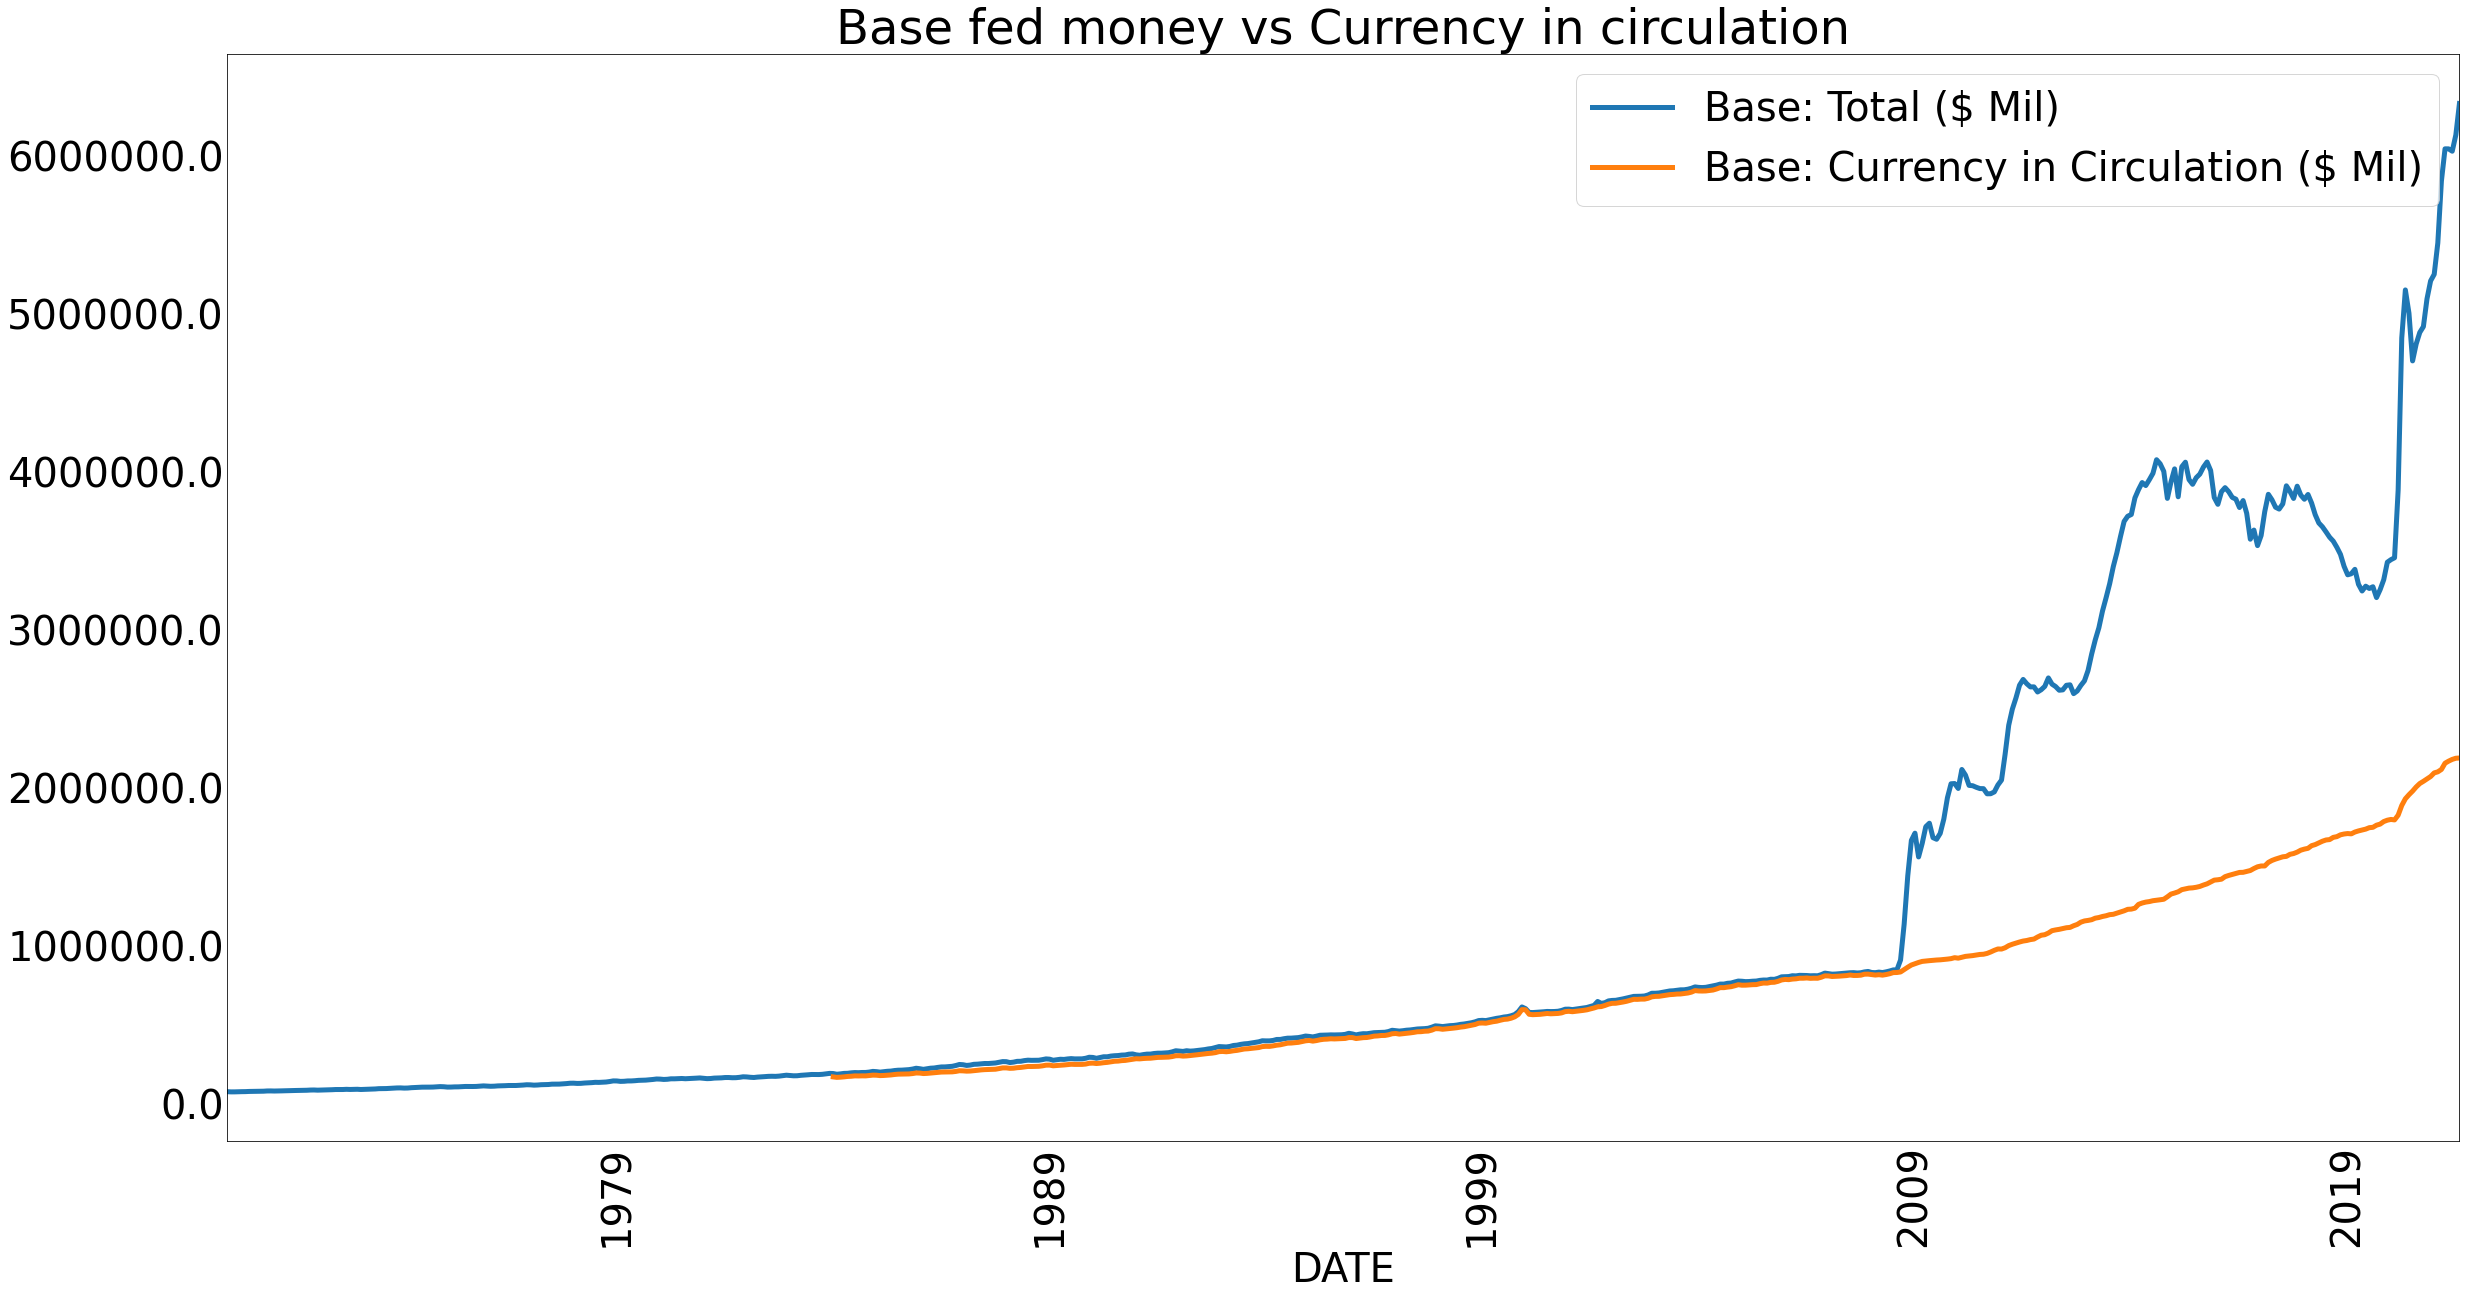

In [10]:
pp = PdfPages("Monetary base measures.pdf")  # this will allow us to save our visualizatiosn as a pdf
plt.rcParams.update({"font.size":40})
plot_variables = ['Base: Total ($ Mil)', 
                 'Base: Currency in Circulation ($ Mil)']
plot_df = data[plot_variables]

plot_lines(plot_df, linewidth = 5, pp = pp)
pp.close()
plt.title('Base fed money vs Currency in circulation')

# building stack plots
##### stack plots allow us to fill in areas of line graphs to show parts of an aggregate measure

In [11]:
def plot_stacked_lines(df, 
                    plot_vars, 
                    linewidth = 1, 
                    figsize = (40,20), 
                    pp = None, 
                    total_var = False):
    fig, ax = plt.subplots(figsize = figsize)
    df[plot_vars].plot.area(stacked = True, 
                           linewidth = linewidth, 
                           ax = ax)
    if total_var != False: 
        df[total_var].plot.line(linewidth = linewidth, 
                                ax = ax, 
                                c = 'k', 
                                label = total_var,
                                ls = '--')
    ax.legend(loc = 2, ncol = 2)
    if pp != None: pp.savefig(fig, bbox_inches = 'tight')
        
    
    

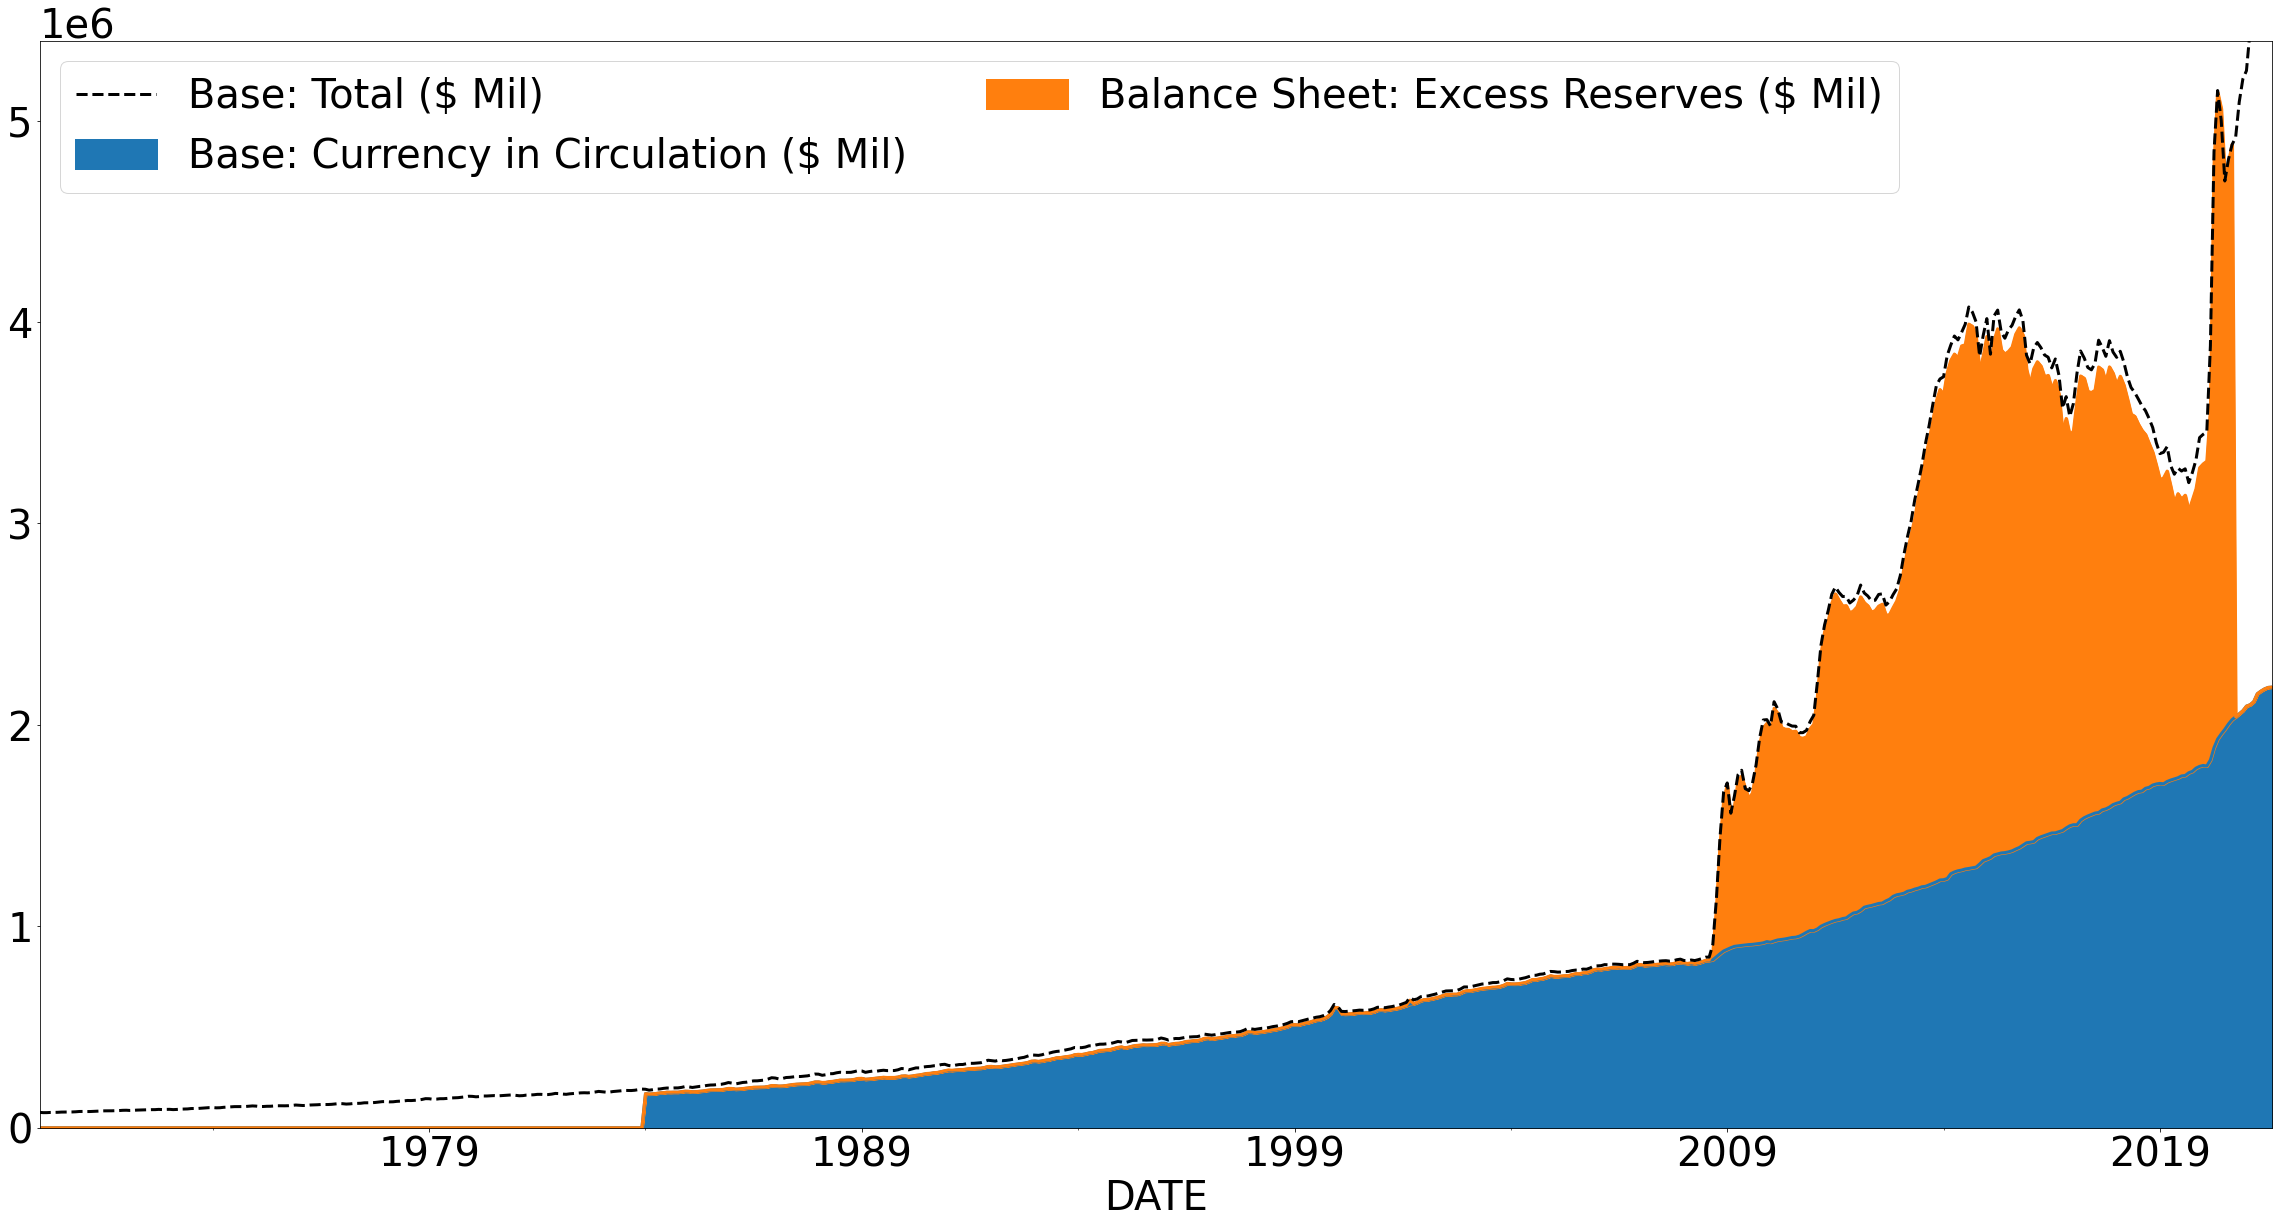

In [12]:
pp = PdfPages('StackedPlots.pdf')
money_vars = ["Base: Currency in Circulation ($ Mil)",
              "Balance Sheet: Excess Reserves ($ Mil)"]
total_var = 'Base: Total ($ Mil)'

plot_stacked_lines(data,
                   money_vars,
                   linewidth = 3,
                   total_var = "Base: Total ($ Mil)") 

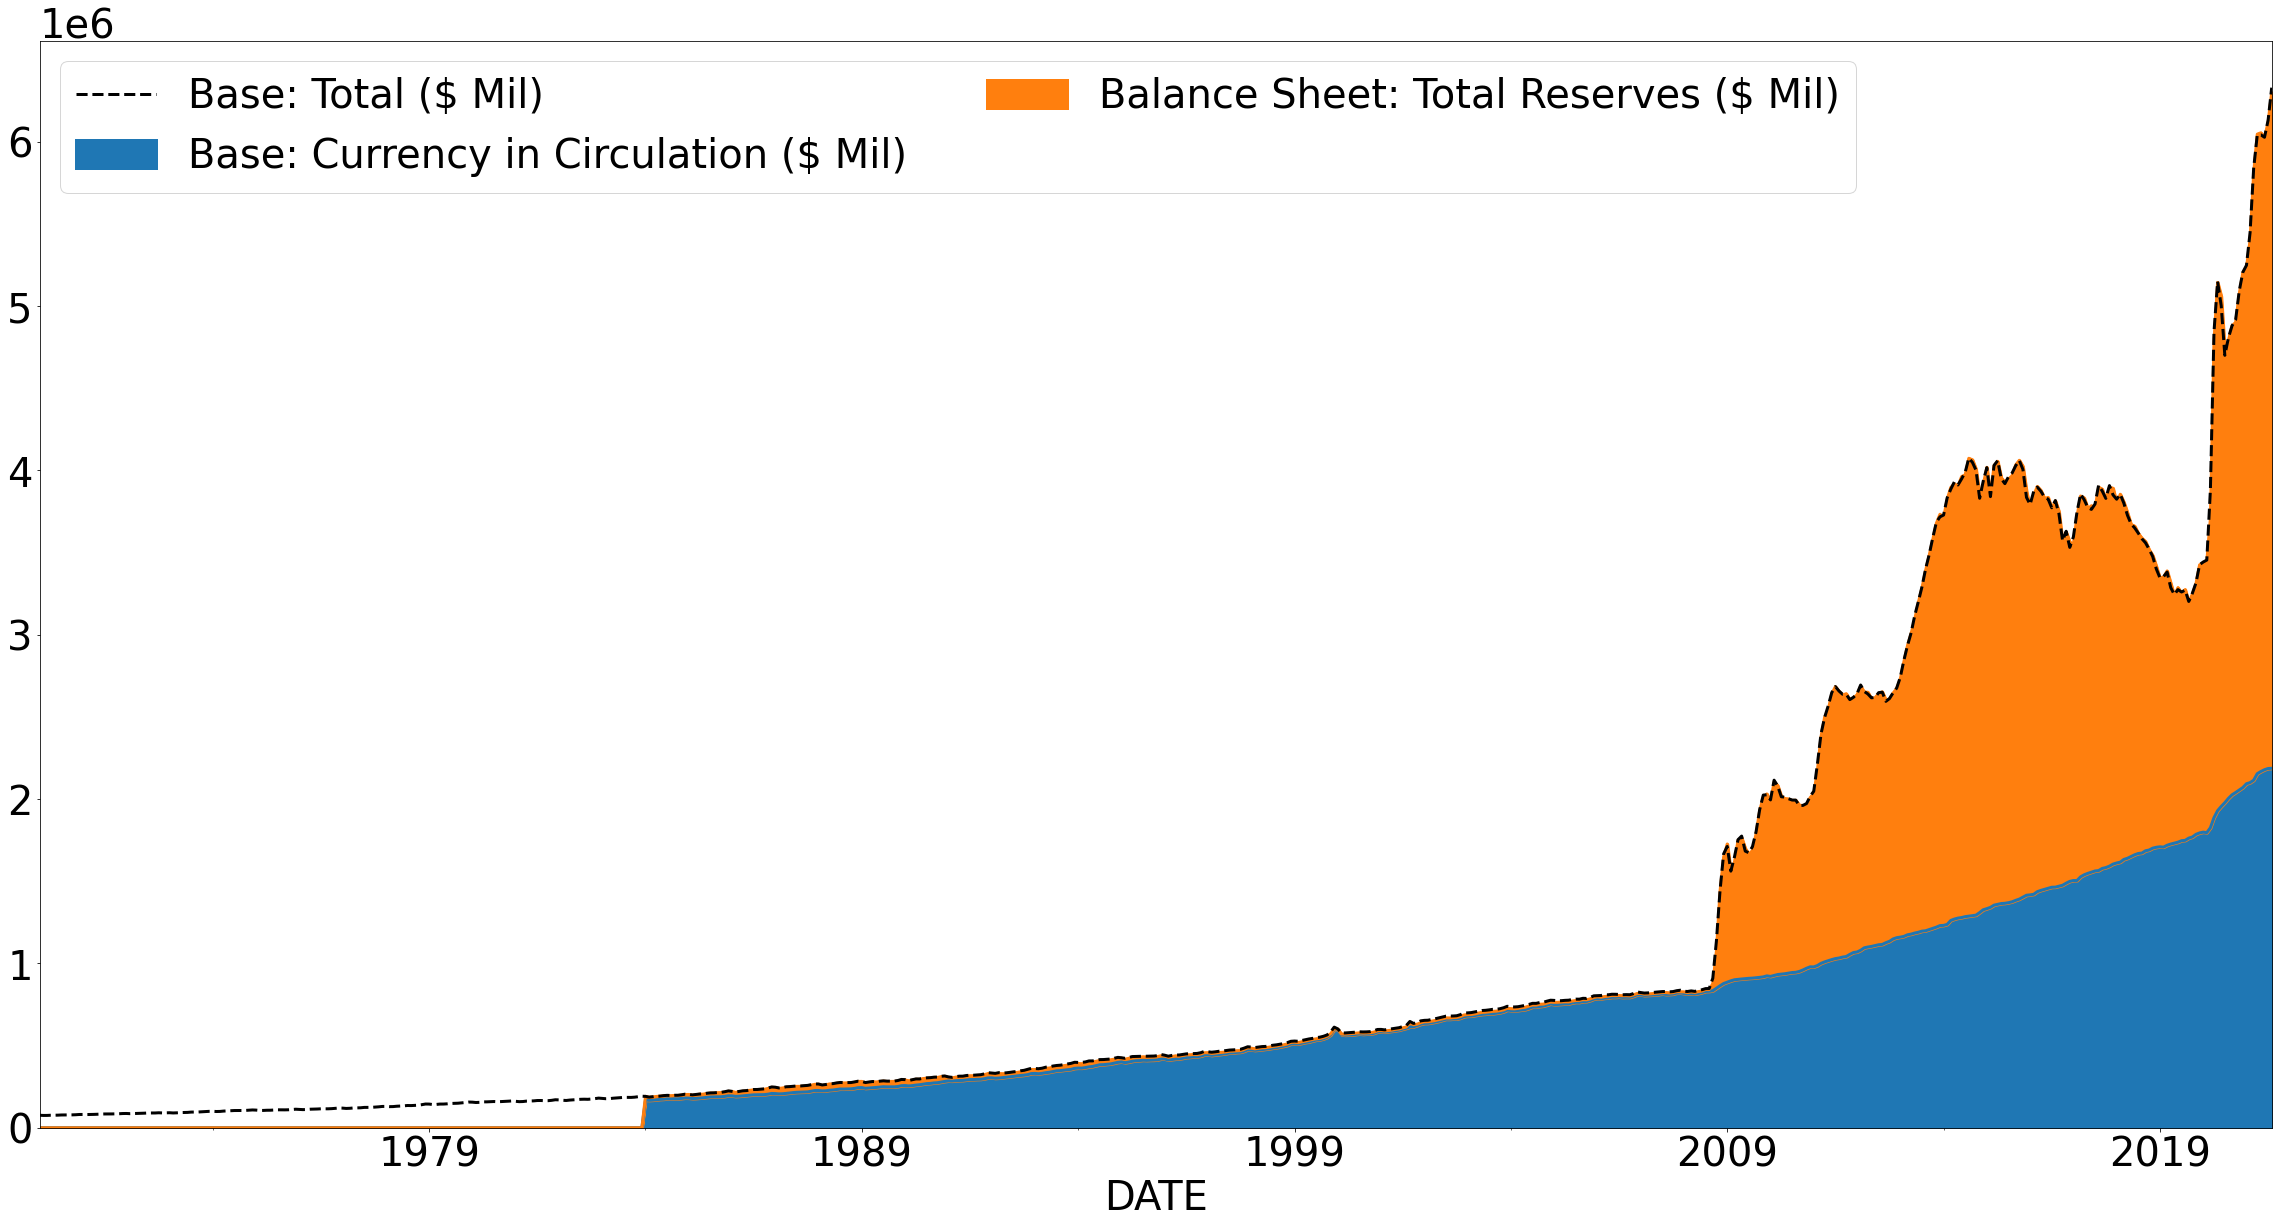

In [13]:
money_vars = ["Base: Currency in Circulation ($ Mil)",
              "Balance Sheet: Total Reserves ($ Mil)"]
total_var = 'Base: Total ($ Mil)'

plot_stacked_lines(data,
                   money_vars,
                   linewidth = 3,
                   total_var = "Base: Total ($ Mil)") 

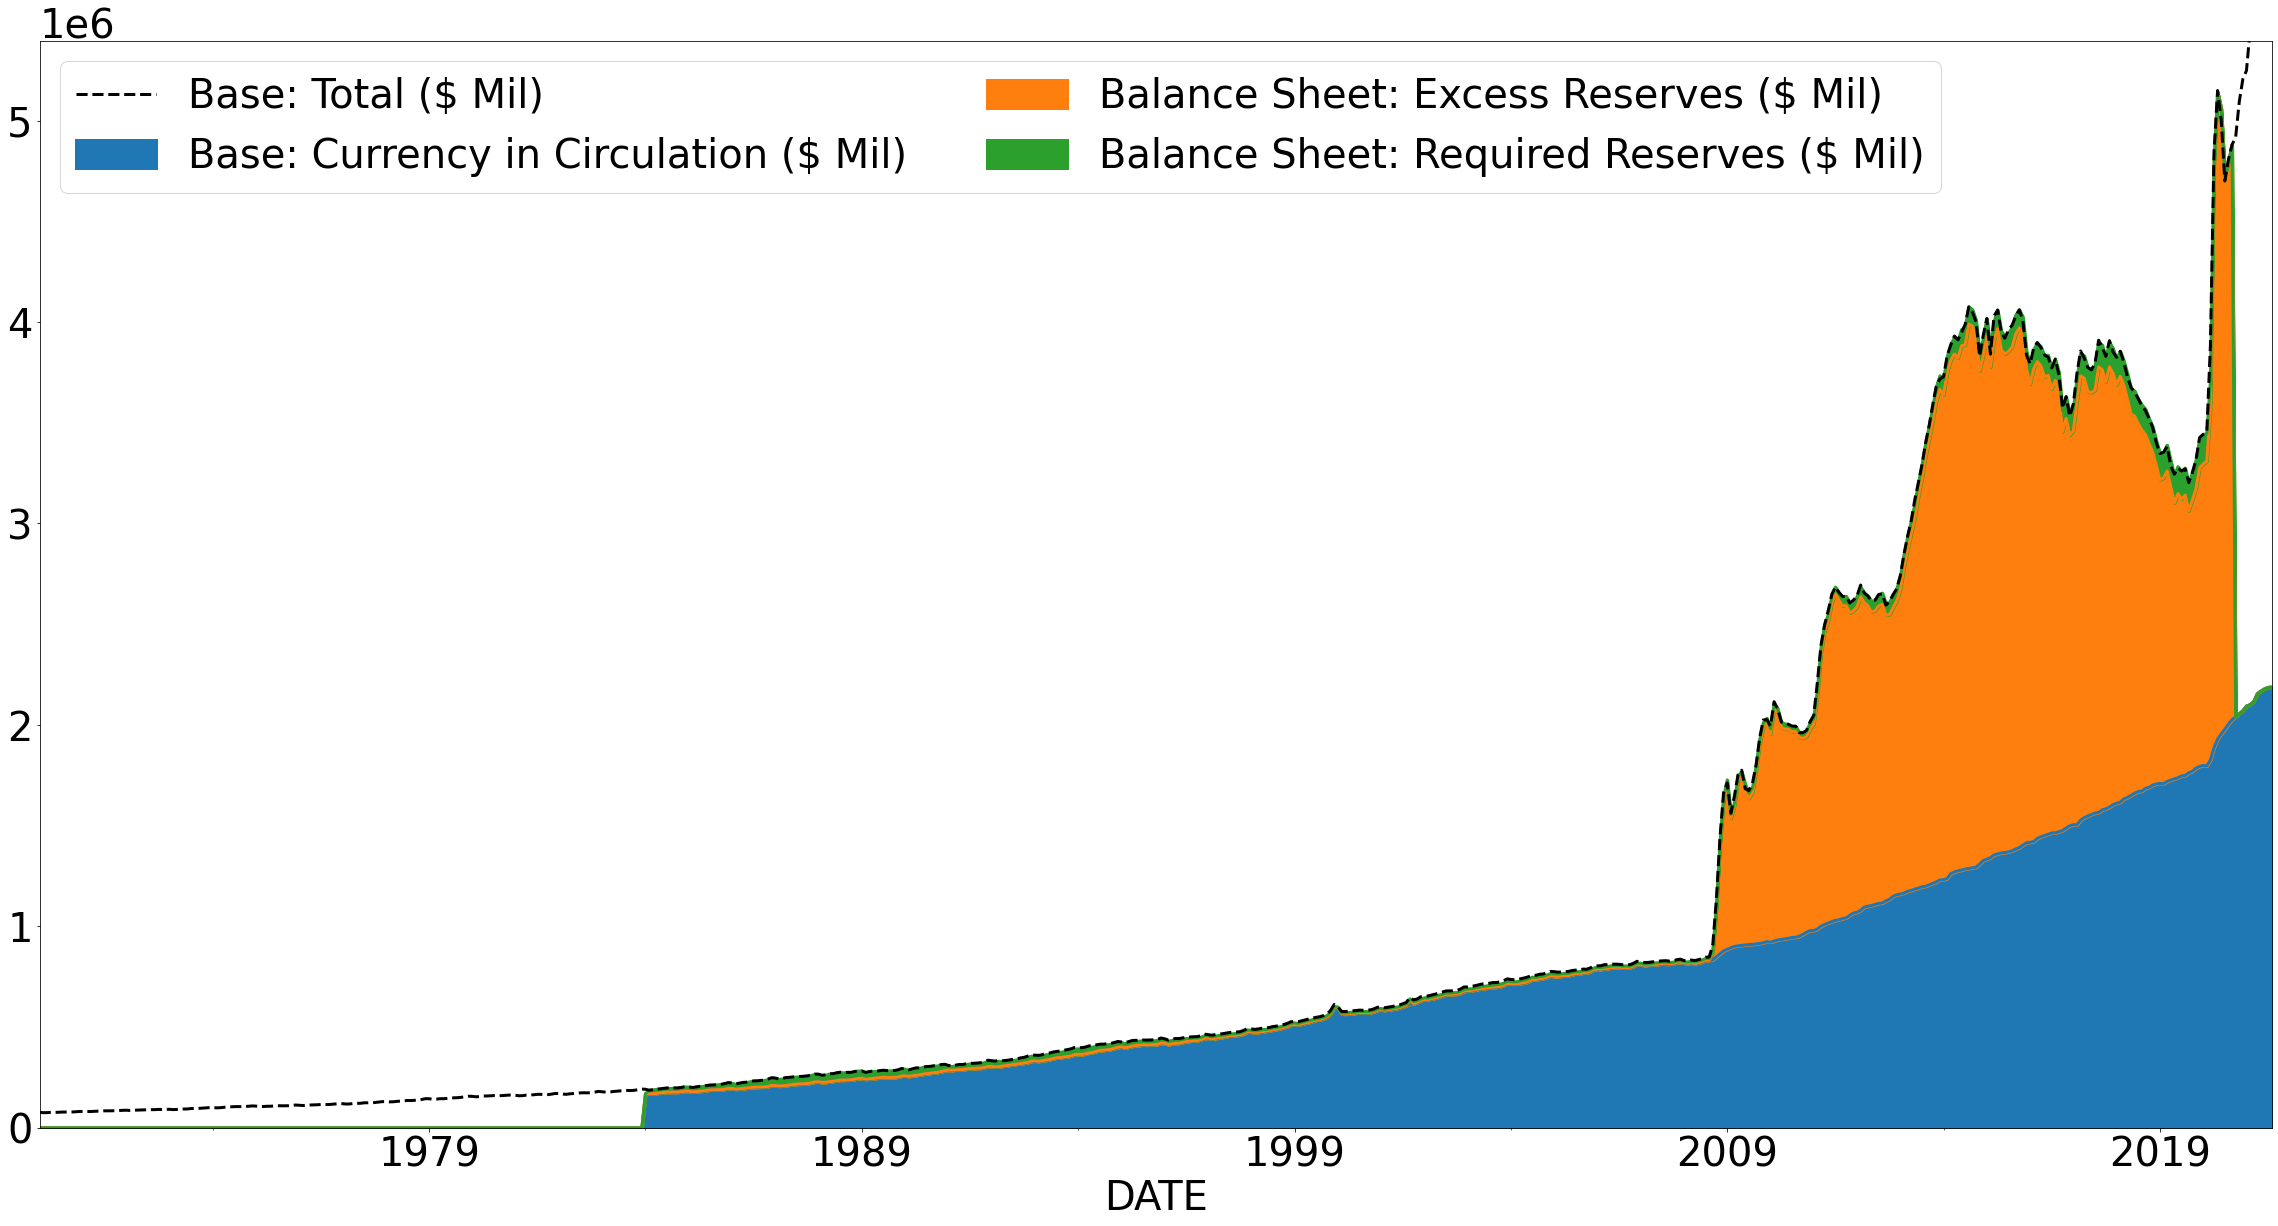

In [15]:
# we can fill in the space left between excess reserves and total 



money_vars = ["Base: Currency in Circulation ($ Mil)",
              "Balance Sheet: Excess Reserves ($ Mil)", 
             'Balance Sheet: Required Reserves ($ Mil)']
total_var = 'Base: Total ($ Mil)'

plot_stacked_lines(data,
                   money_vars,
                   linewidth = 3,
                   total_var = "Base: Total ($ Mil)") 

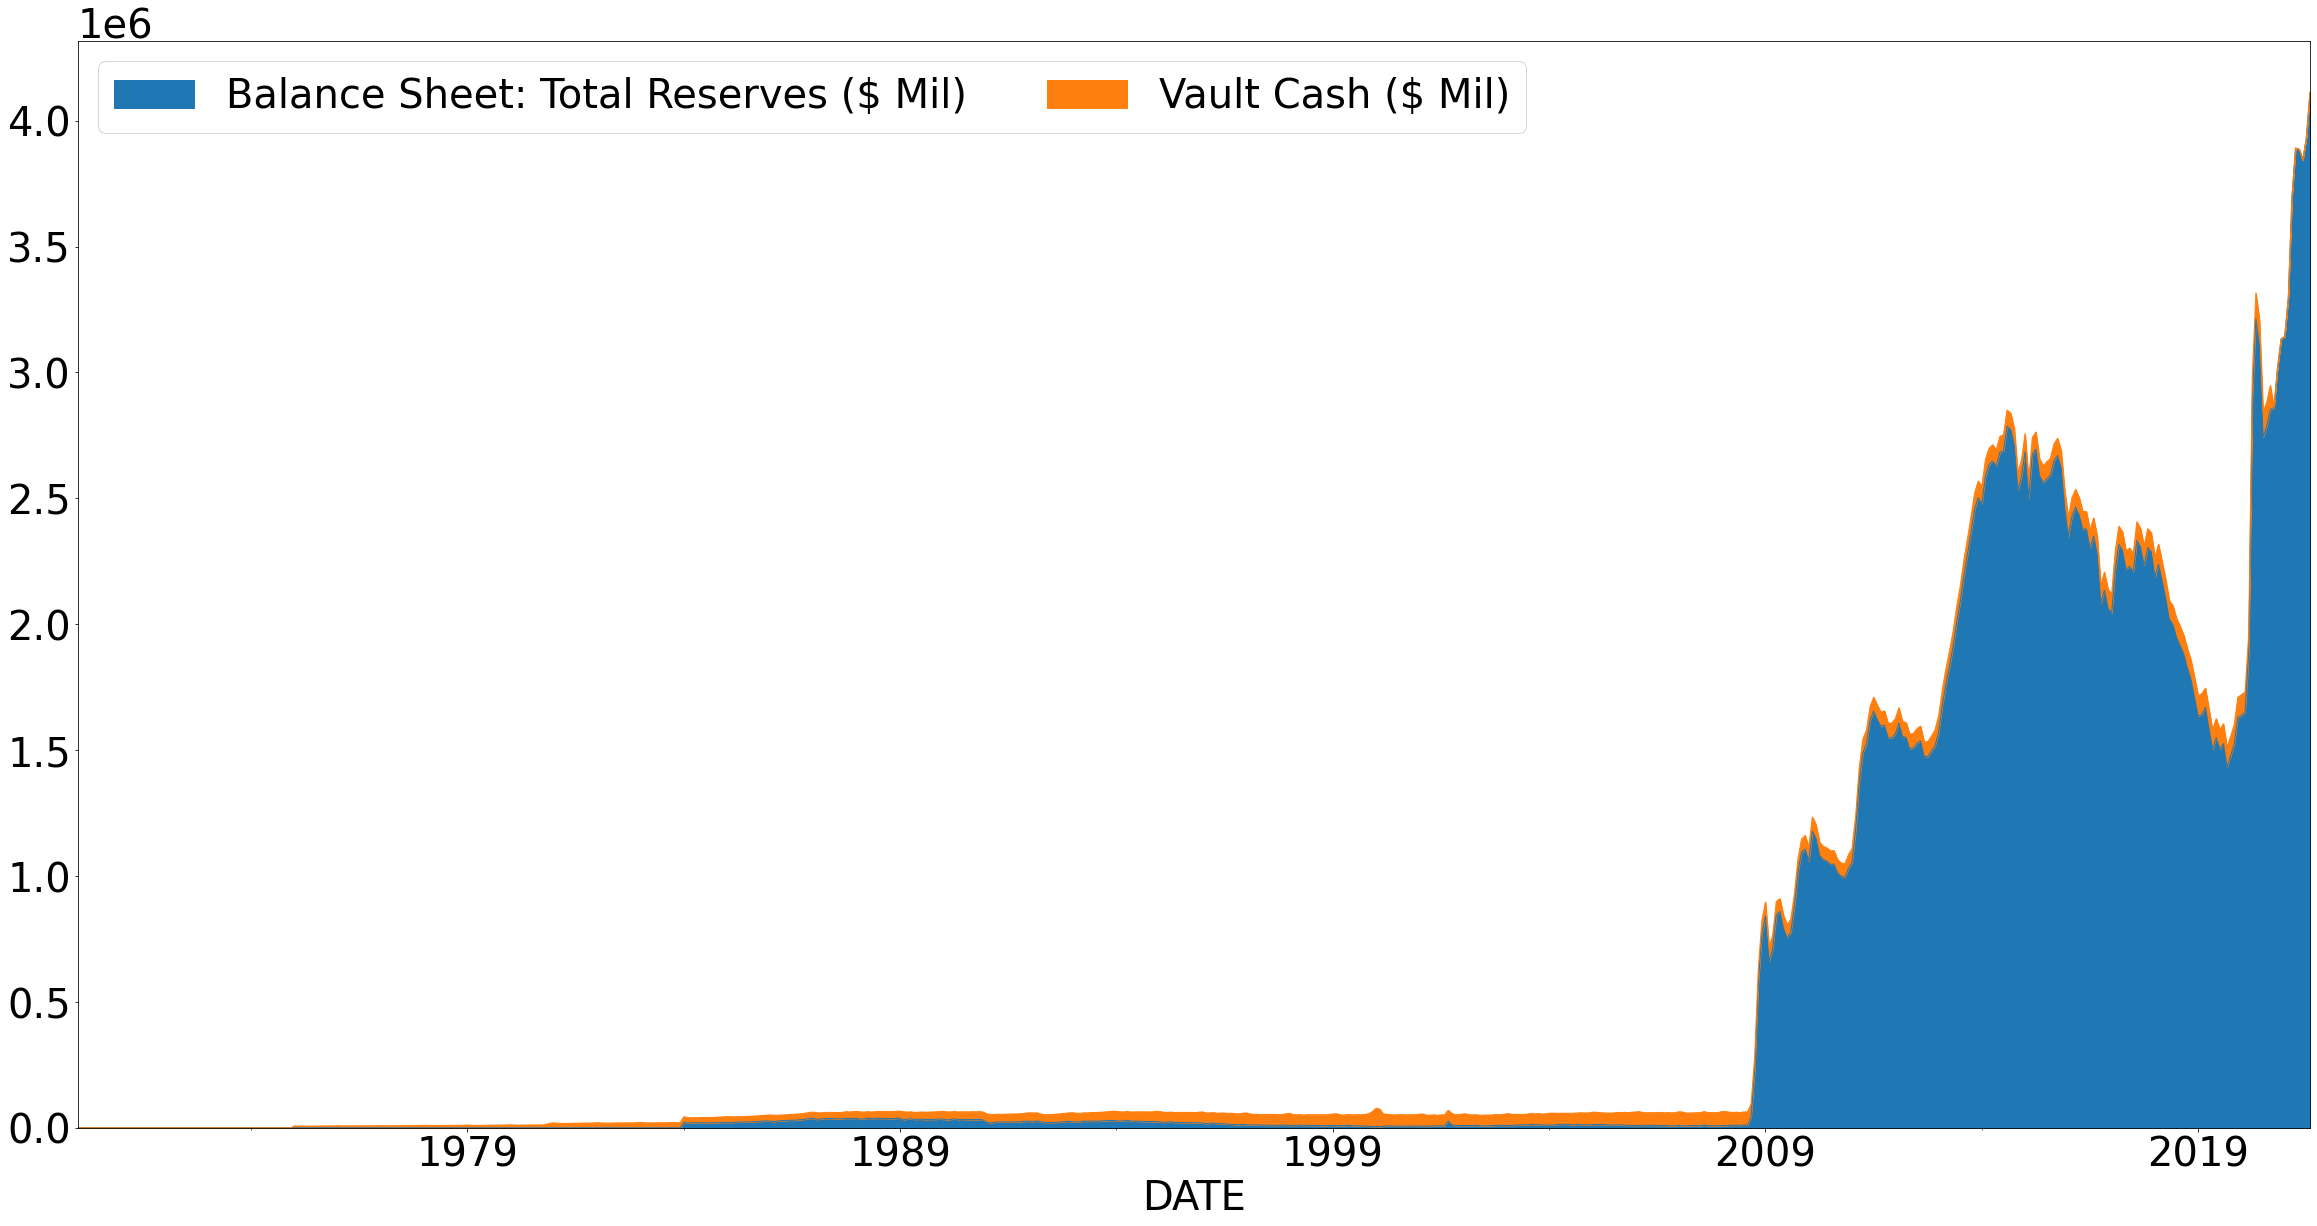

In [16]:
reserve_vars = ['Balance Sheet: Total Reserves ($ Mil)', 
               'Vault Cash ($ Mil)']
plot_stacked_lines(data, reserve_vars, pp=pp)

#### In the new paradigm, banks hold most of their reserves at the fed, not in their own vaults. This graph displays the end of the vault cash era. 

In [30]:
data['Vault Cash Used as Excess ($ Mil)'] = data['Vault Cash ($ Mil)'].sub(data['Vault Cash Used as Req. ($ Mil)'])
data['Vault Cash Used as Excess ($ Mil)']

DATE
1970-01-31   NaN
1970-02-28   NaN
1970-03-31   NaN
1970-04-30   NaN
1970-05-31   NaN
              ..
2021-04-30   NaN
2021-05-31   NaN
2021-06-30   NaN
2021-07-31   NaN
2021-08-31   NaN
Freq: M, Name: Vault Cash Used as Excess ($ Mil), Length: 620, dtype: float64

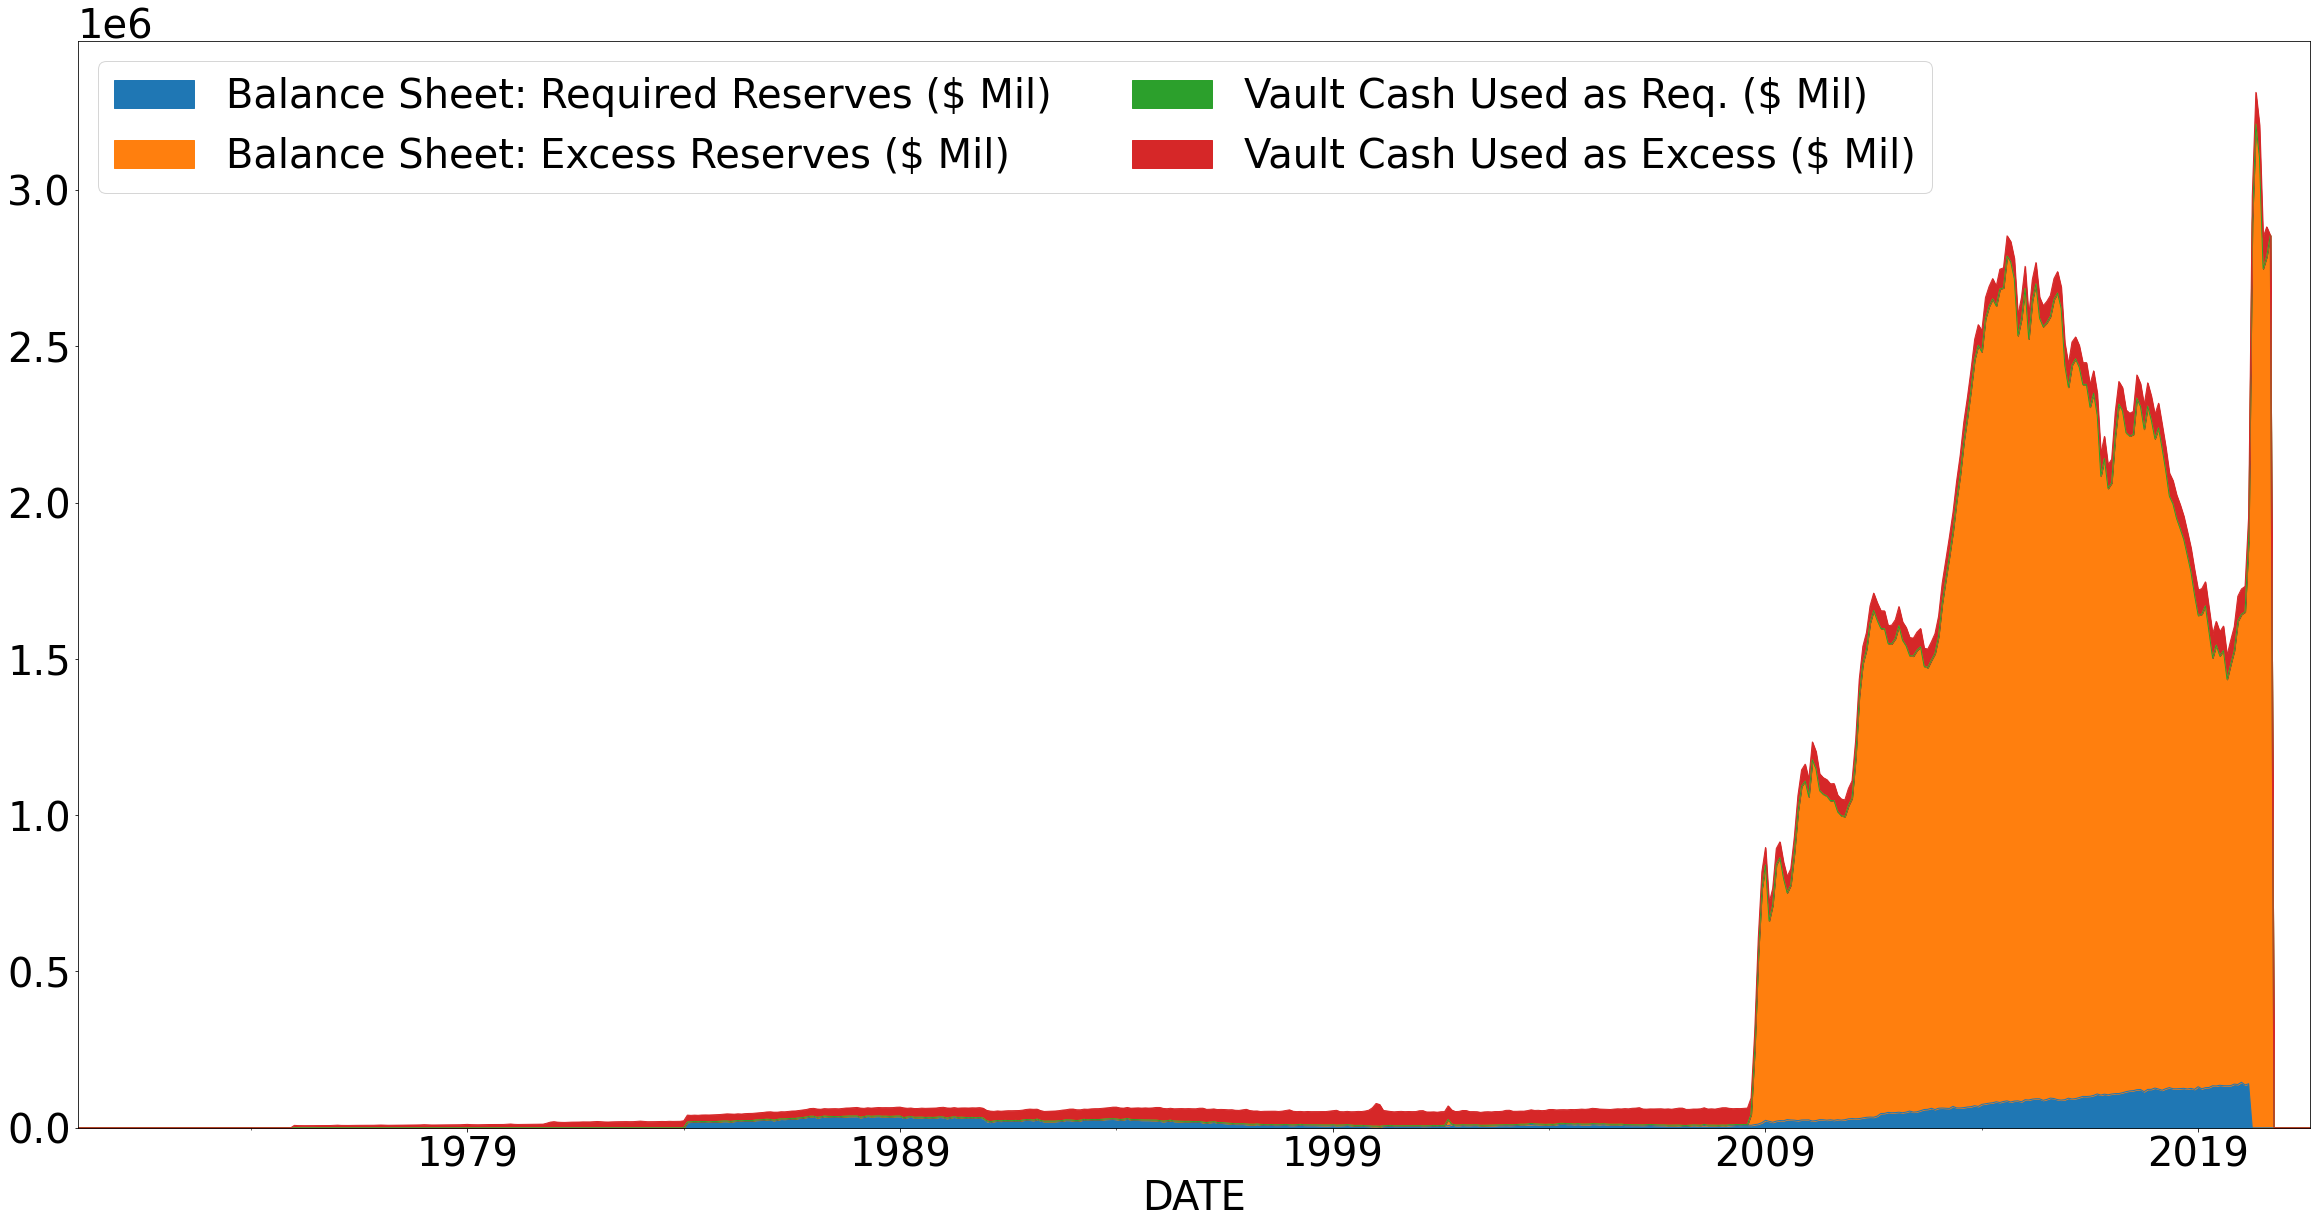

In [32]:
reserve_vars = ['Balance Sheet: Required Reserves ($ Mil)', 
               'Balance Sheet: Excess Reserves ($ Mil)', 
               'Vault Cash Used as Req. ($ Mil)', 
               'Vault Cash Used as Excess ($ Mil)']
plot_stacked_lines(data, reserve_vars, pp=pp)

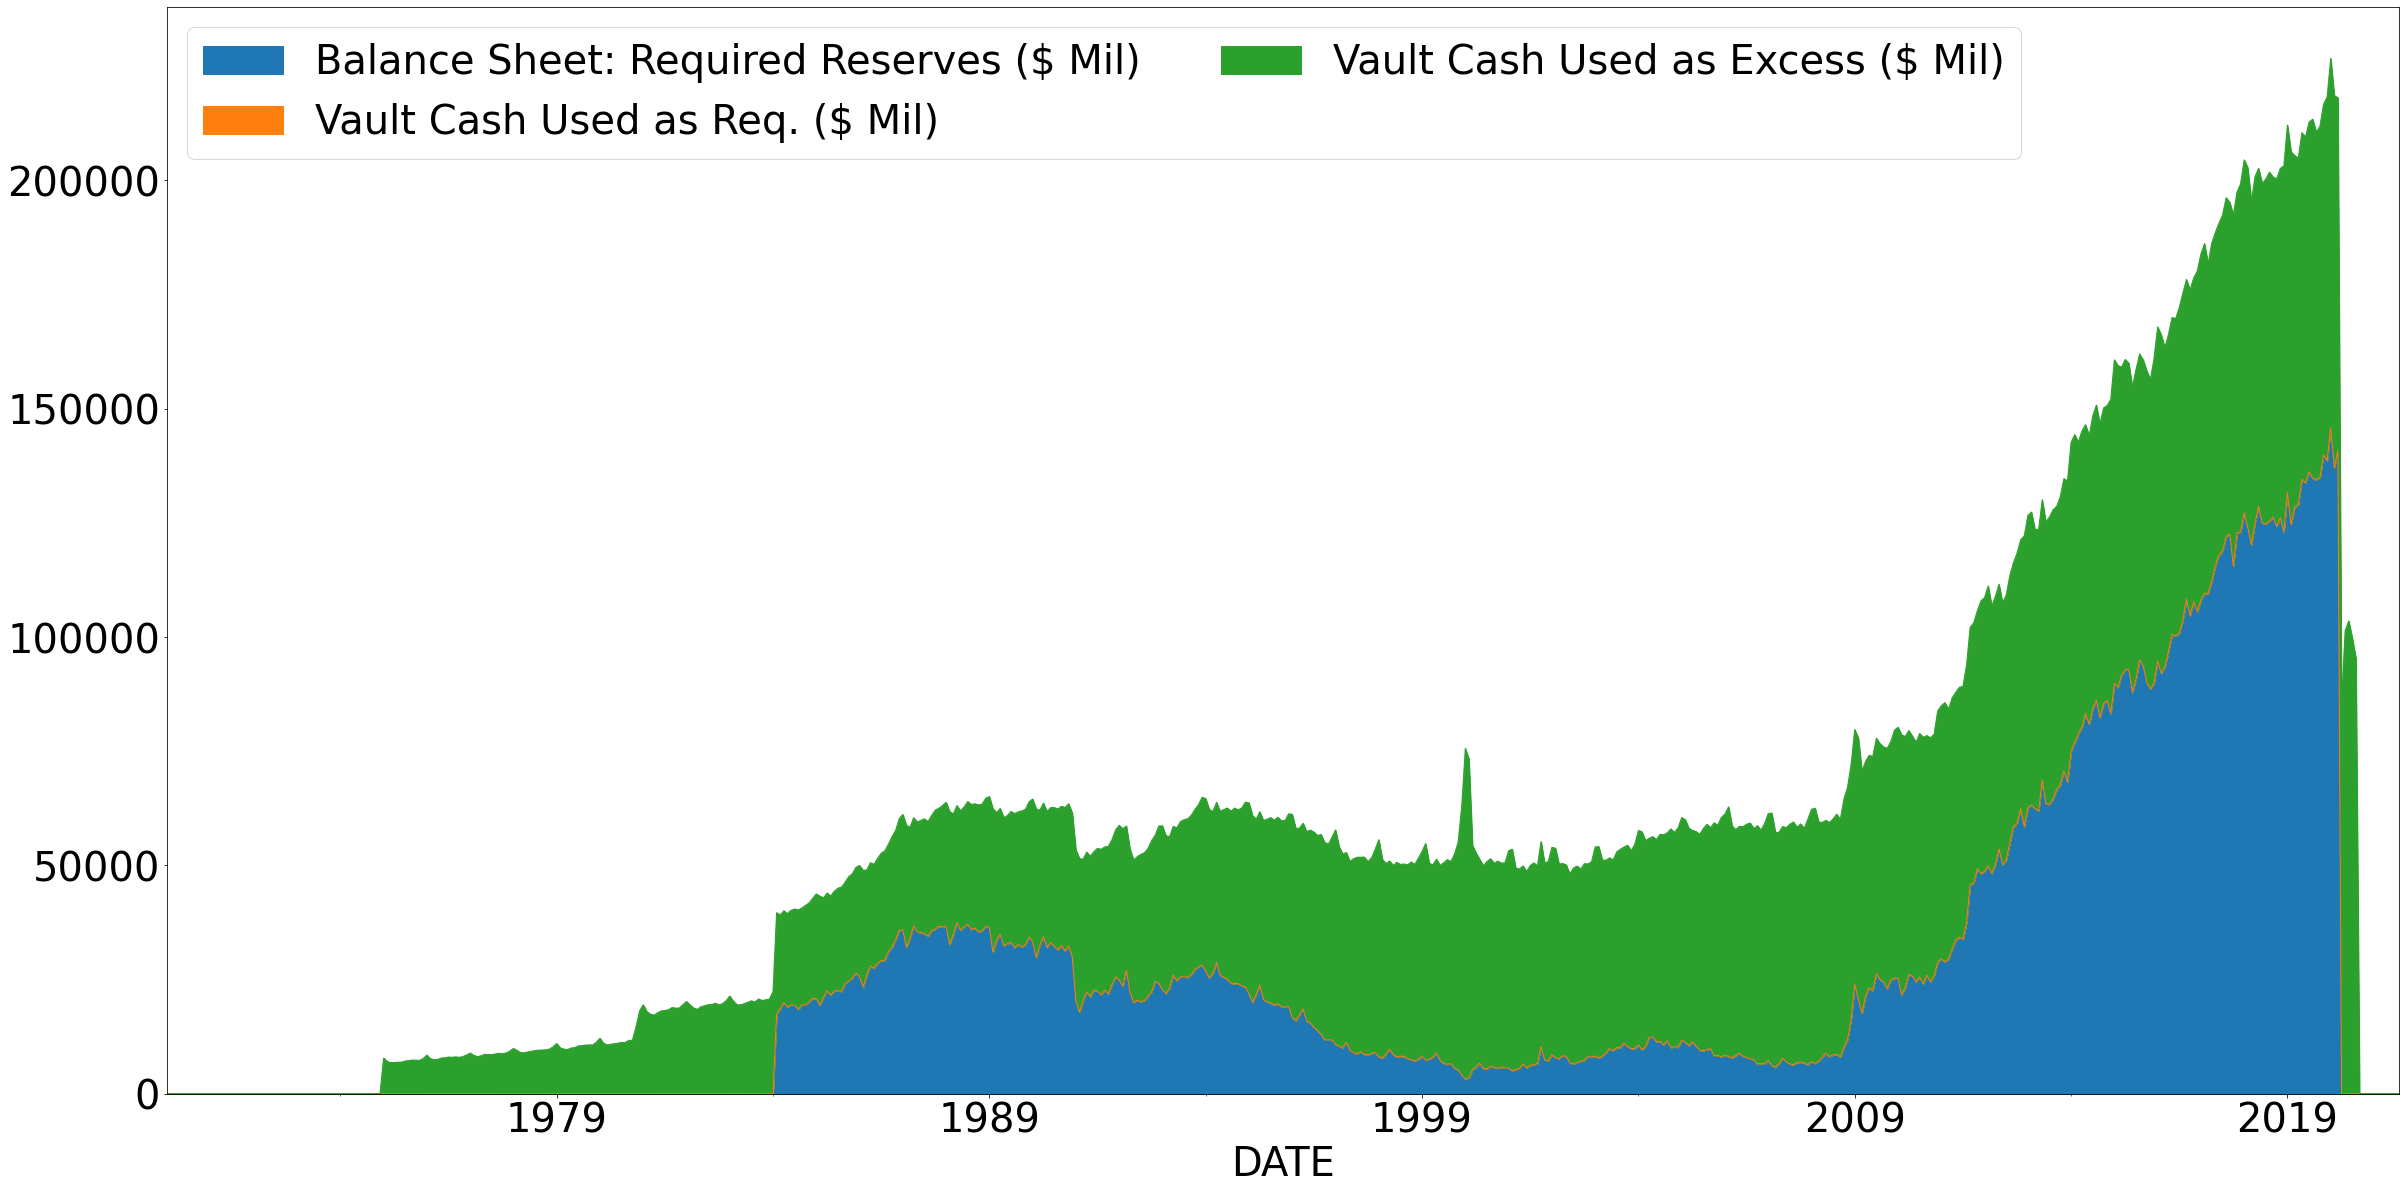

In [35]:
reserve_vars = ['Balance Sheet: Required Reserves ($ Mil)', 
               'Vault Cash Used as Req. ($ Mil)',
                'Vault Cash Used as Excess ($ Mil)']
plot_stacked_lines(data, reserve_vars, pp=pp)

# Assets Held by Federal Reserve

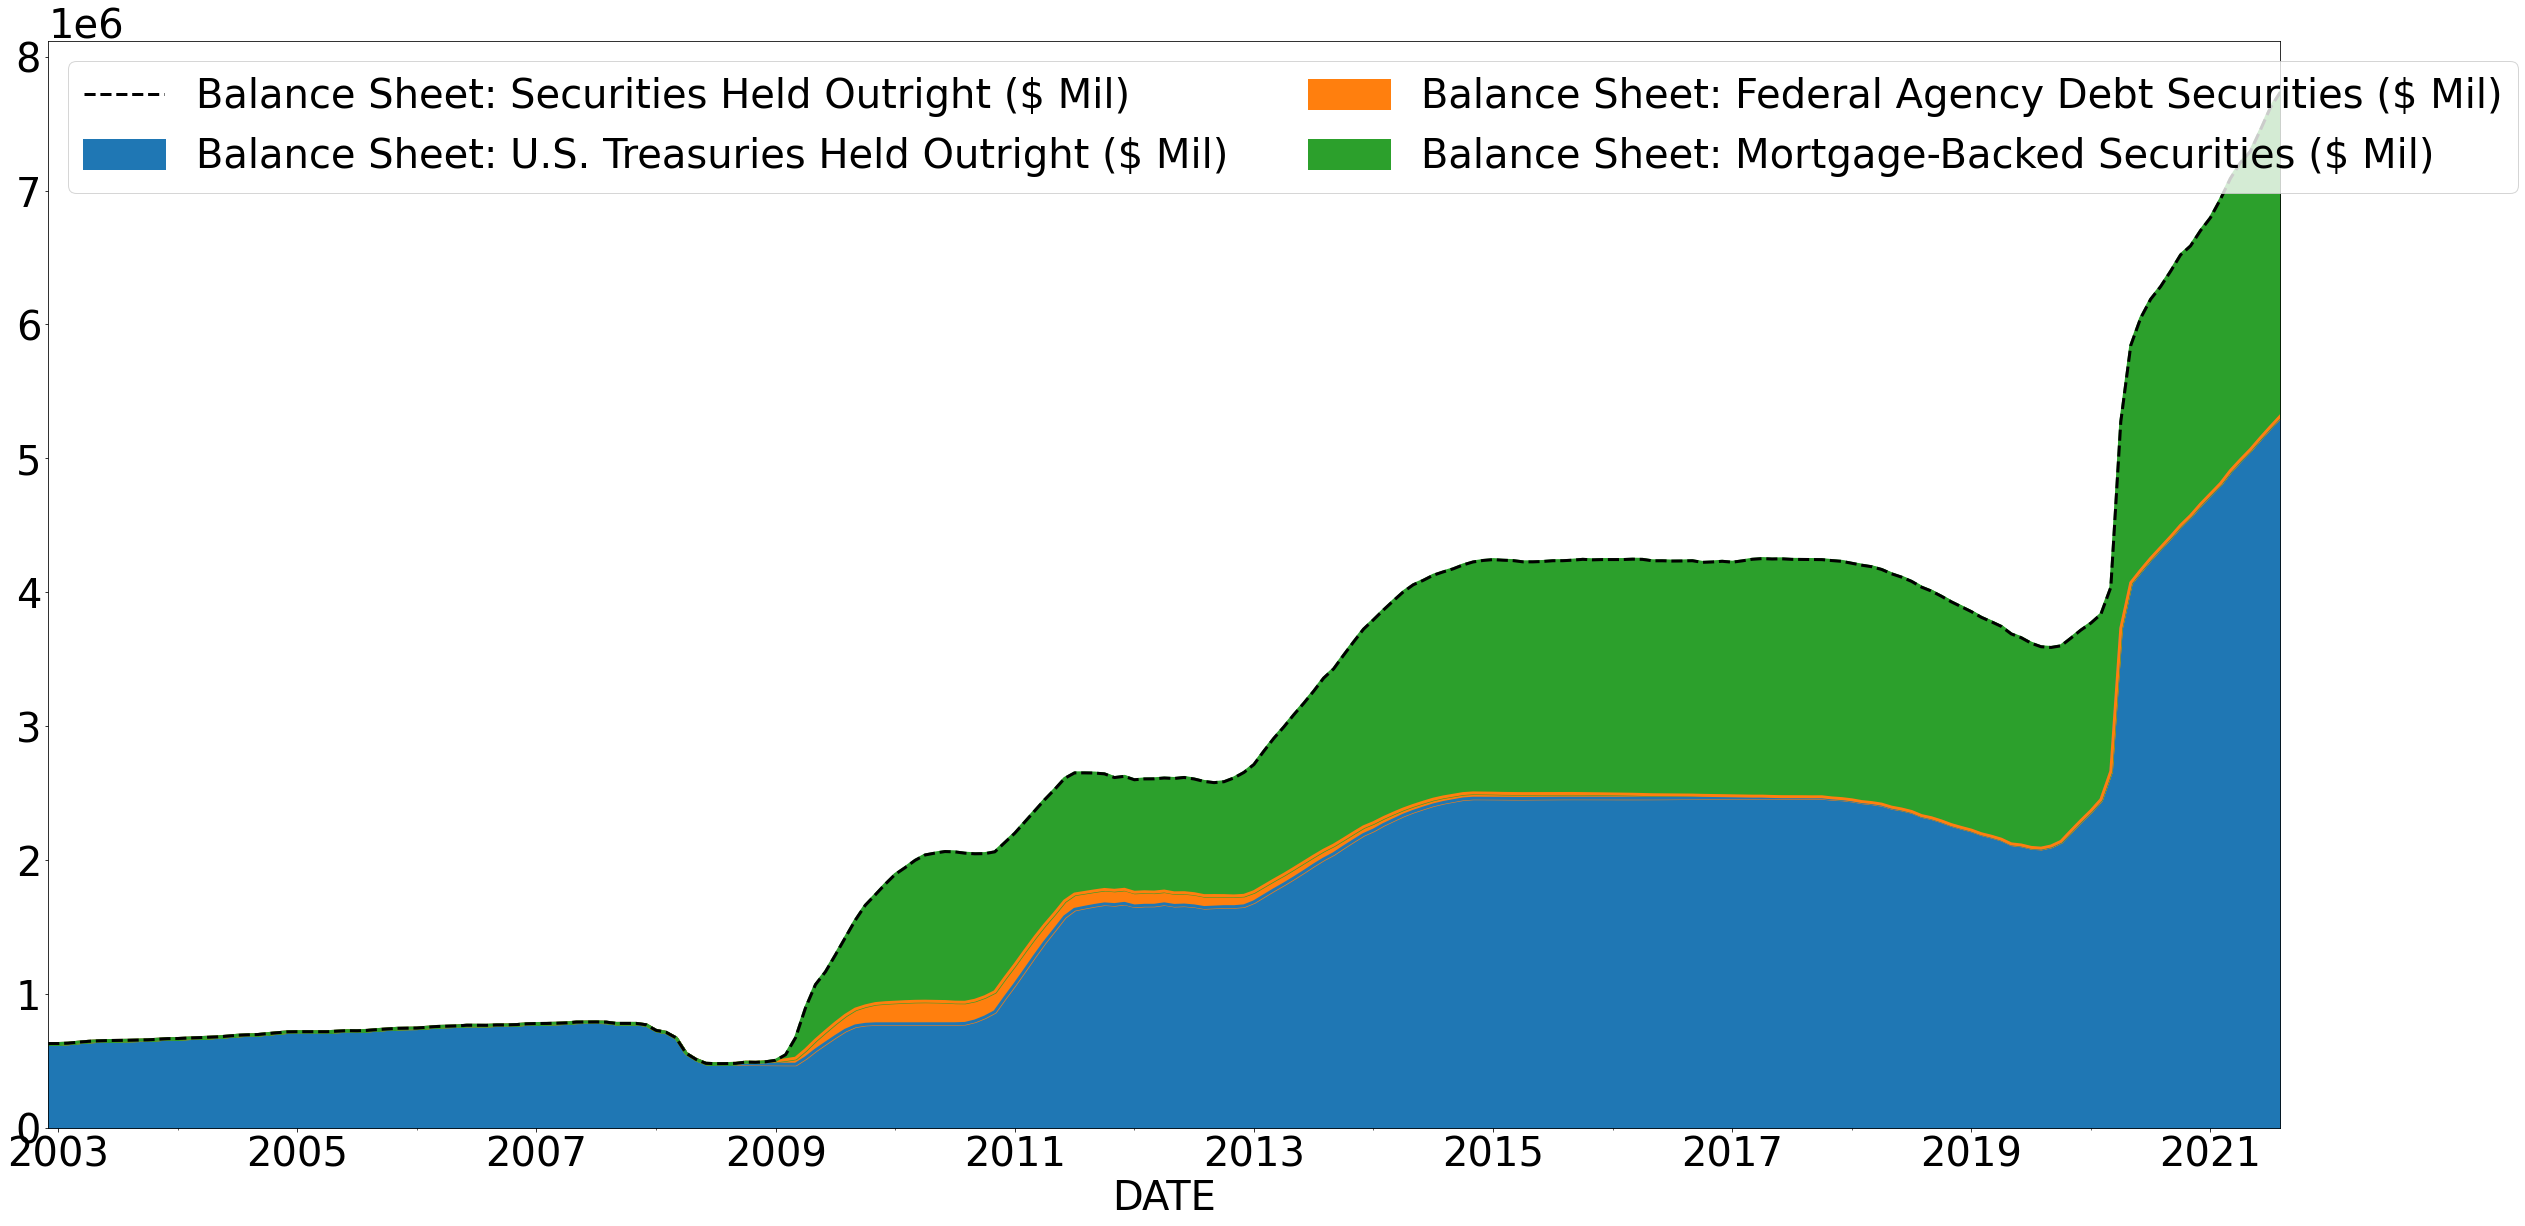

In [51]:
asset_vars = ["Balance Sheet: U.S. Treasuries Held Outright ($ Mil)", 
             "Balance Sheet: Federal Agency Debt Securities ($ Mil)", 
             "Balance Sheet: Mortgage-Backed Securities ($ Mil)"]
plot_stacked_lines(data.loc['2002-12-31':], asset_vars, linewidth = 3, 
                  total_var = "Balance Sheet: Securities Held Outright ($ Mil)", pp=pp)

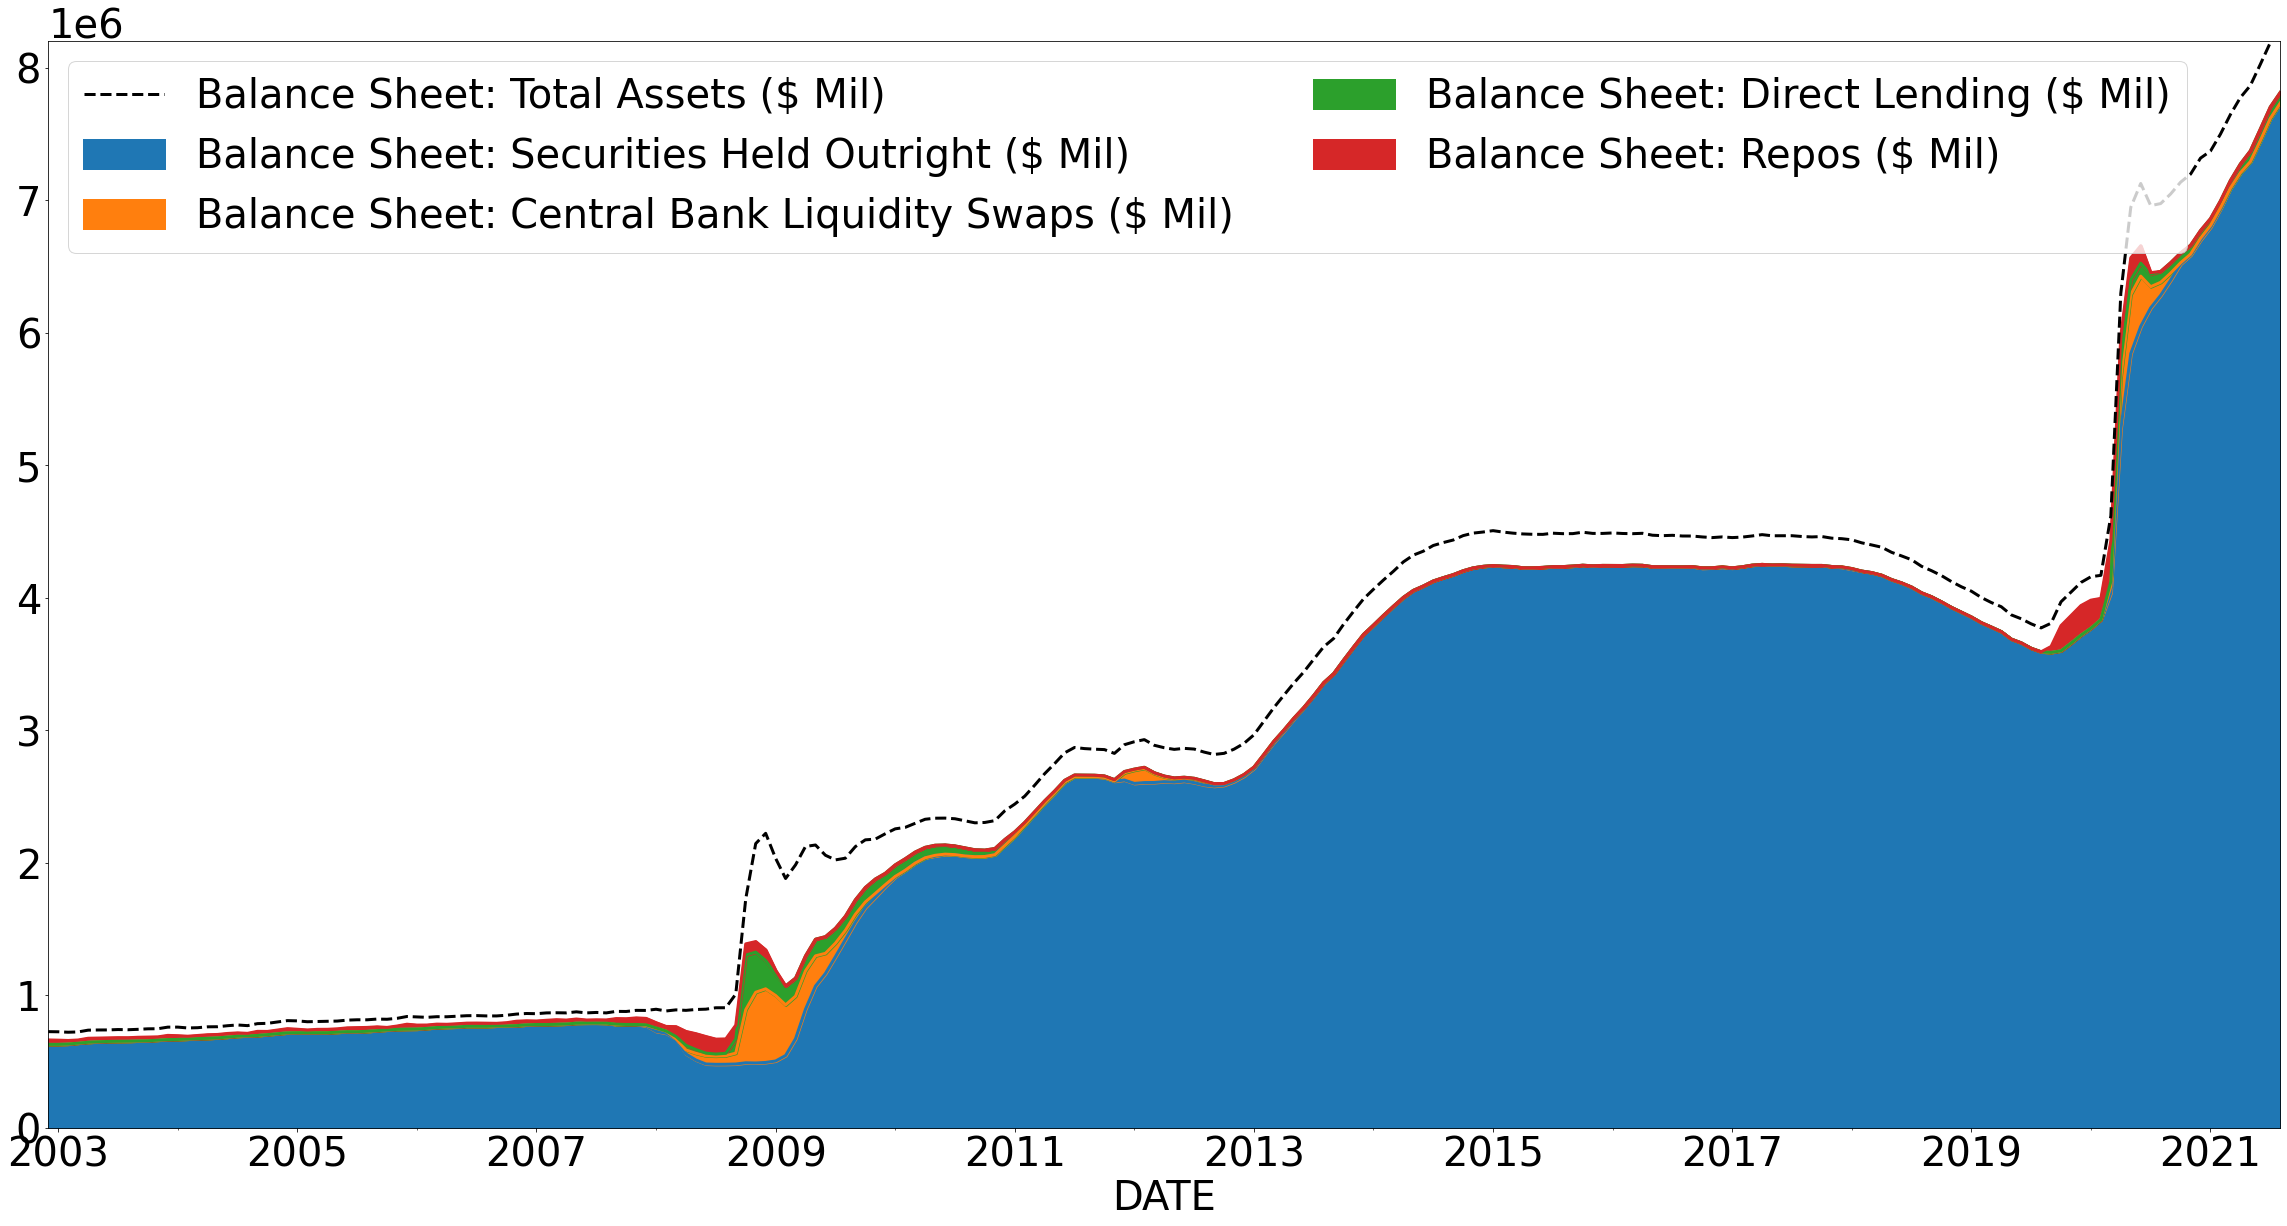

In [56]:

account_vars = ["Balance Sheet: Securities Held Outright ($ Mil)",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)",
               "Balance Sheet: Direct Lending ($ Mil)",
               "Balance Sheet: Repos ($ Mil)"]

plot_stacked_lines(data.loc['2002-12-31':], account_vars, linewidth = 3, 
                   total_var = "Balance Sheet: Total Assets ($ Mil)")



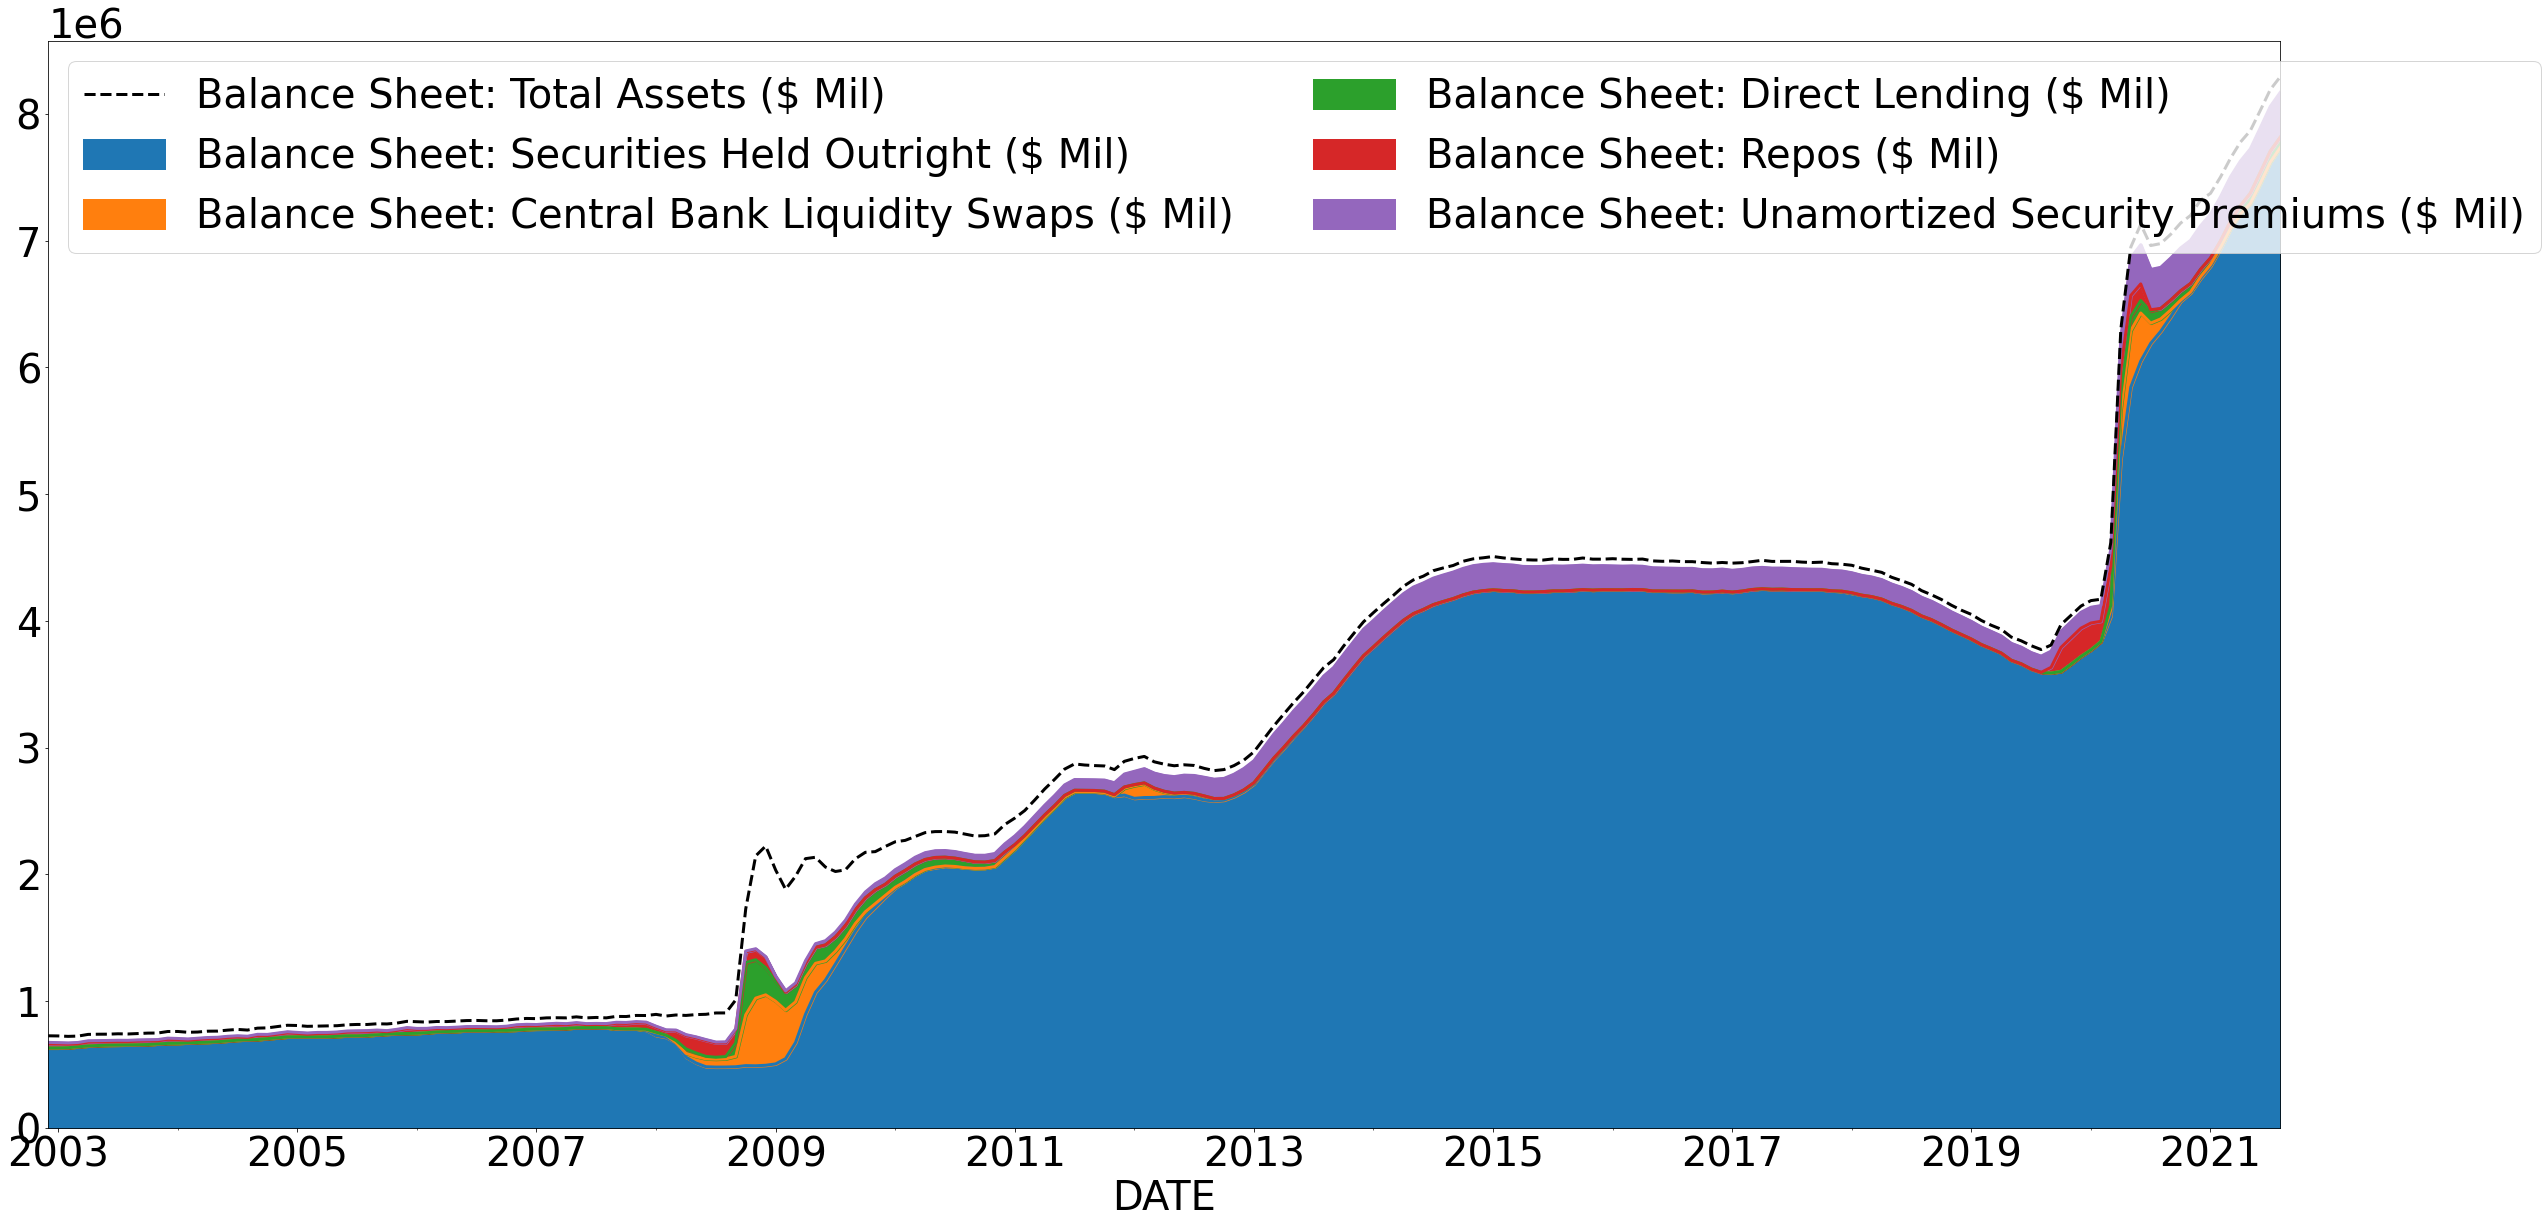

In [57]:
account_vars = ["Balance Sheet: Securities Held Outright ($ Mil)",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)",
               "Balance Sheet: Direct Lending ($ Mil)",
               "Balance Sheet: Repos ($ Mil)", 
               'Balance Sheet: Unamortized Security Premiums ($ Mil)']

plot_stacked_lines(data.loc['2002-12-31':], account_vars, linewidth = 3, 
                   total_var = "Balance Sheet: Total Assets ($ Mil)")

# Liabilities of Federal Reserve
### Currency outstanding, money that has been created; some is circulating, some is not.



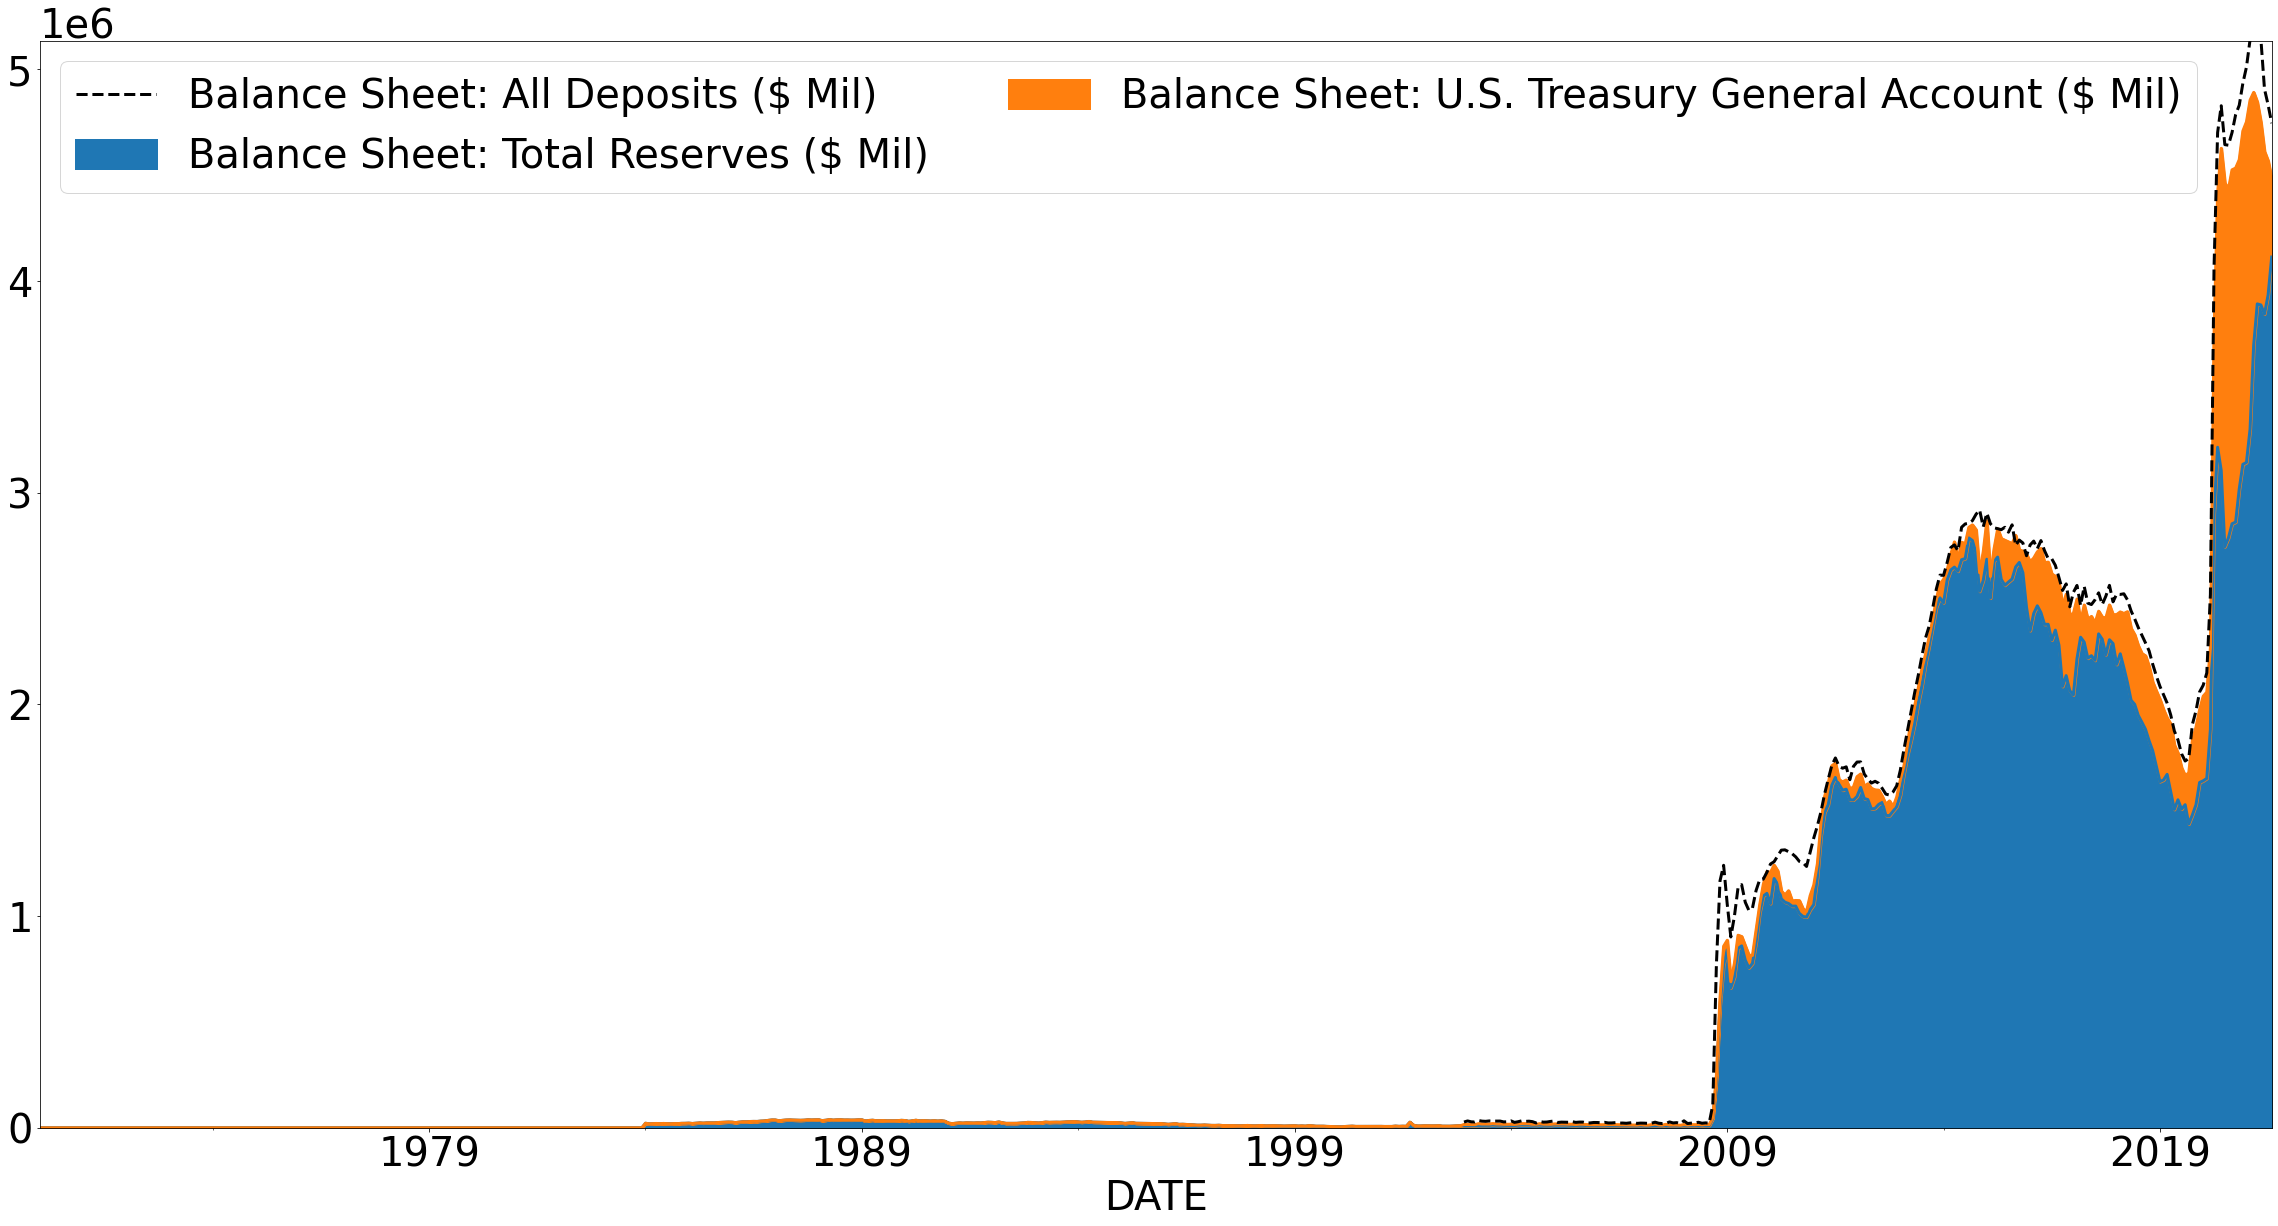

In [65]:
liabilities_vars = ["Balance Sheet: Total Reserves ($ Mil)",
                "Balance Sheet: U.S. Treasury General Account ($ Mil)"]

plot_stacked_lines(data, liabilities_vars, linewidth = 3, total_var = "Balance Sheet: All Deposits ($ Mil)", pp=pp)

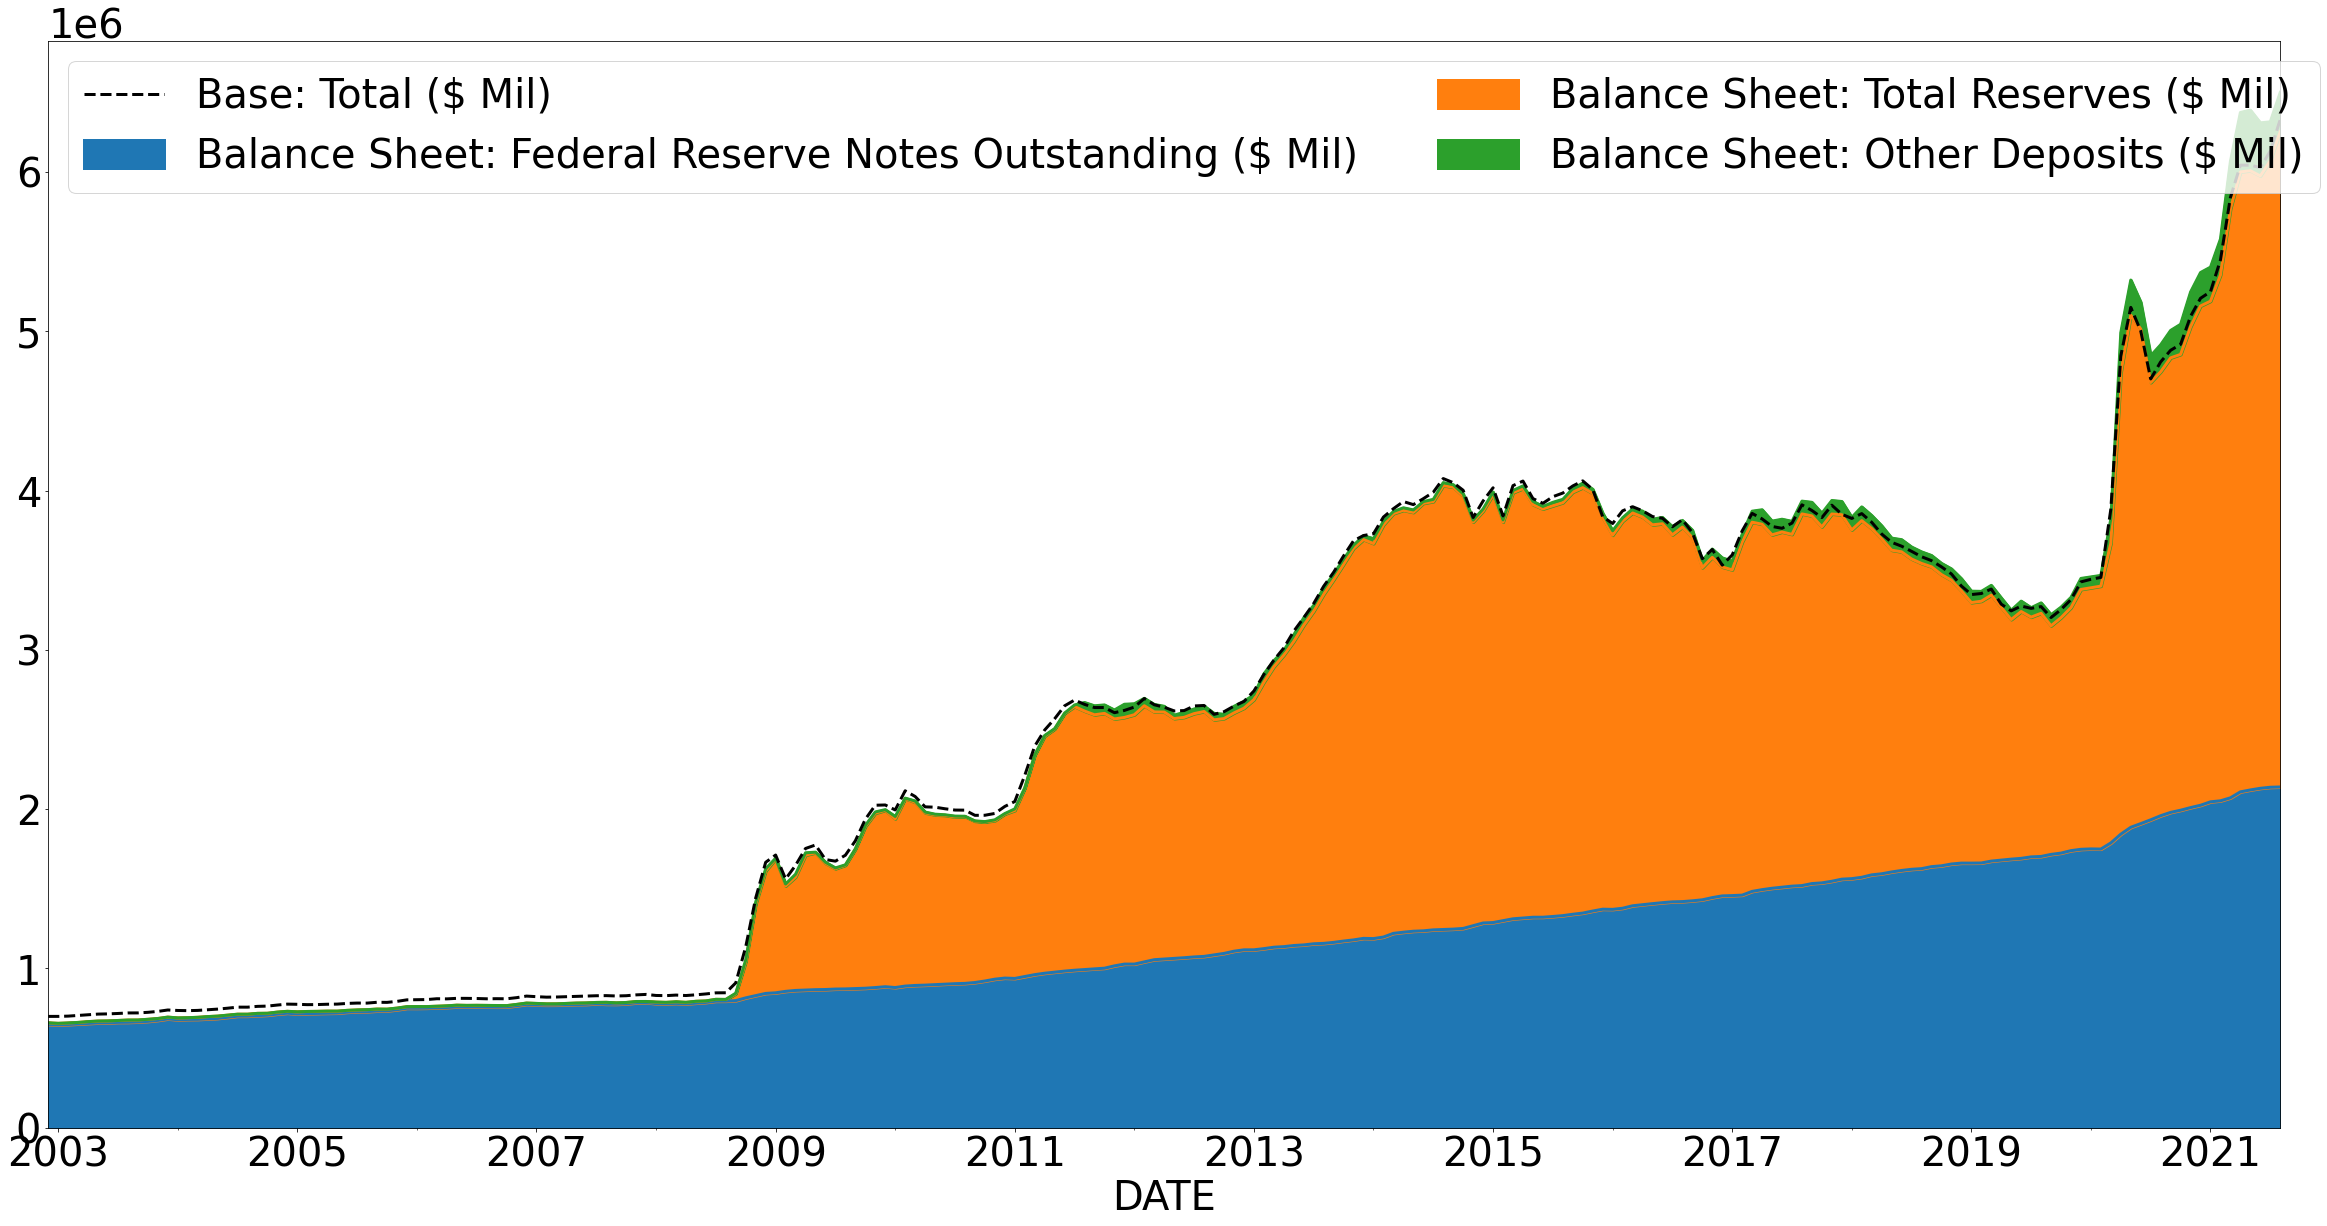

In [70]:
liabilities_vars = ["Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)", "Balance Sheet: Total Reserves ($ Mil)", "Balance Sheet: Other Deposits ($ Mil)"]

plot_stacked_lines(data.loc['2002-12-31':], liabilities_vars, linewidth = 3, total_var = "Base: Total ($ Mil)", pp=pp)

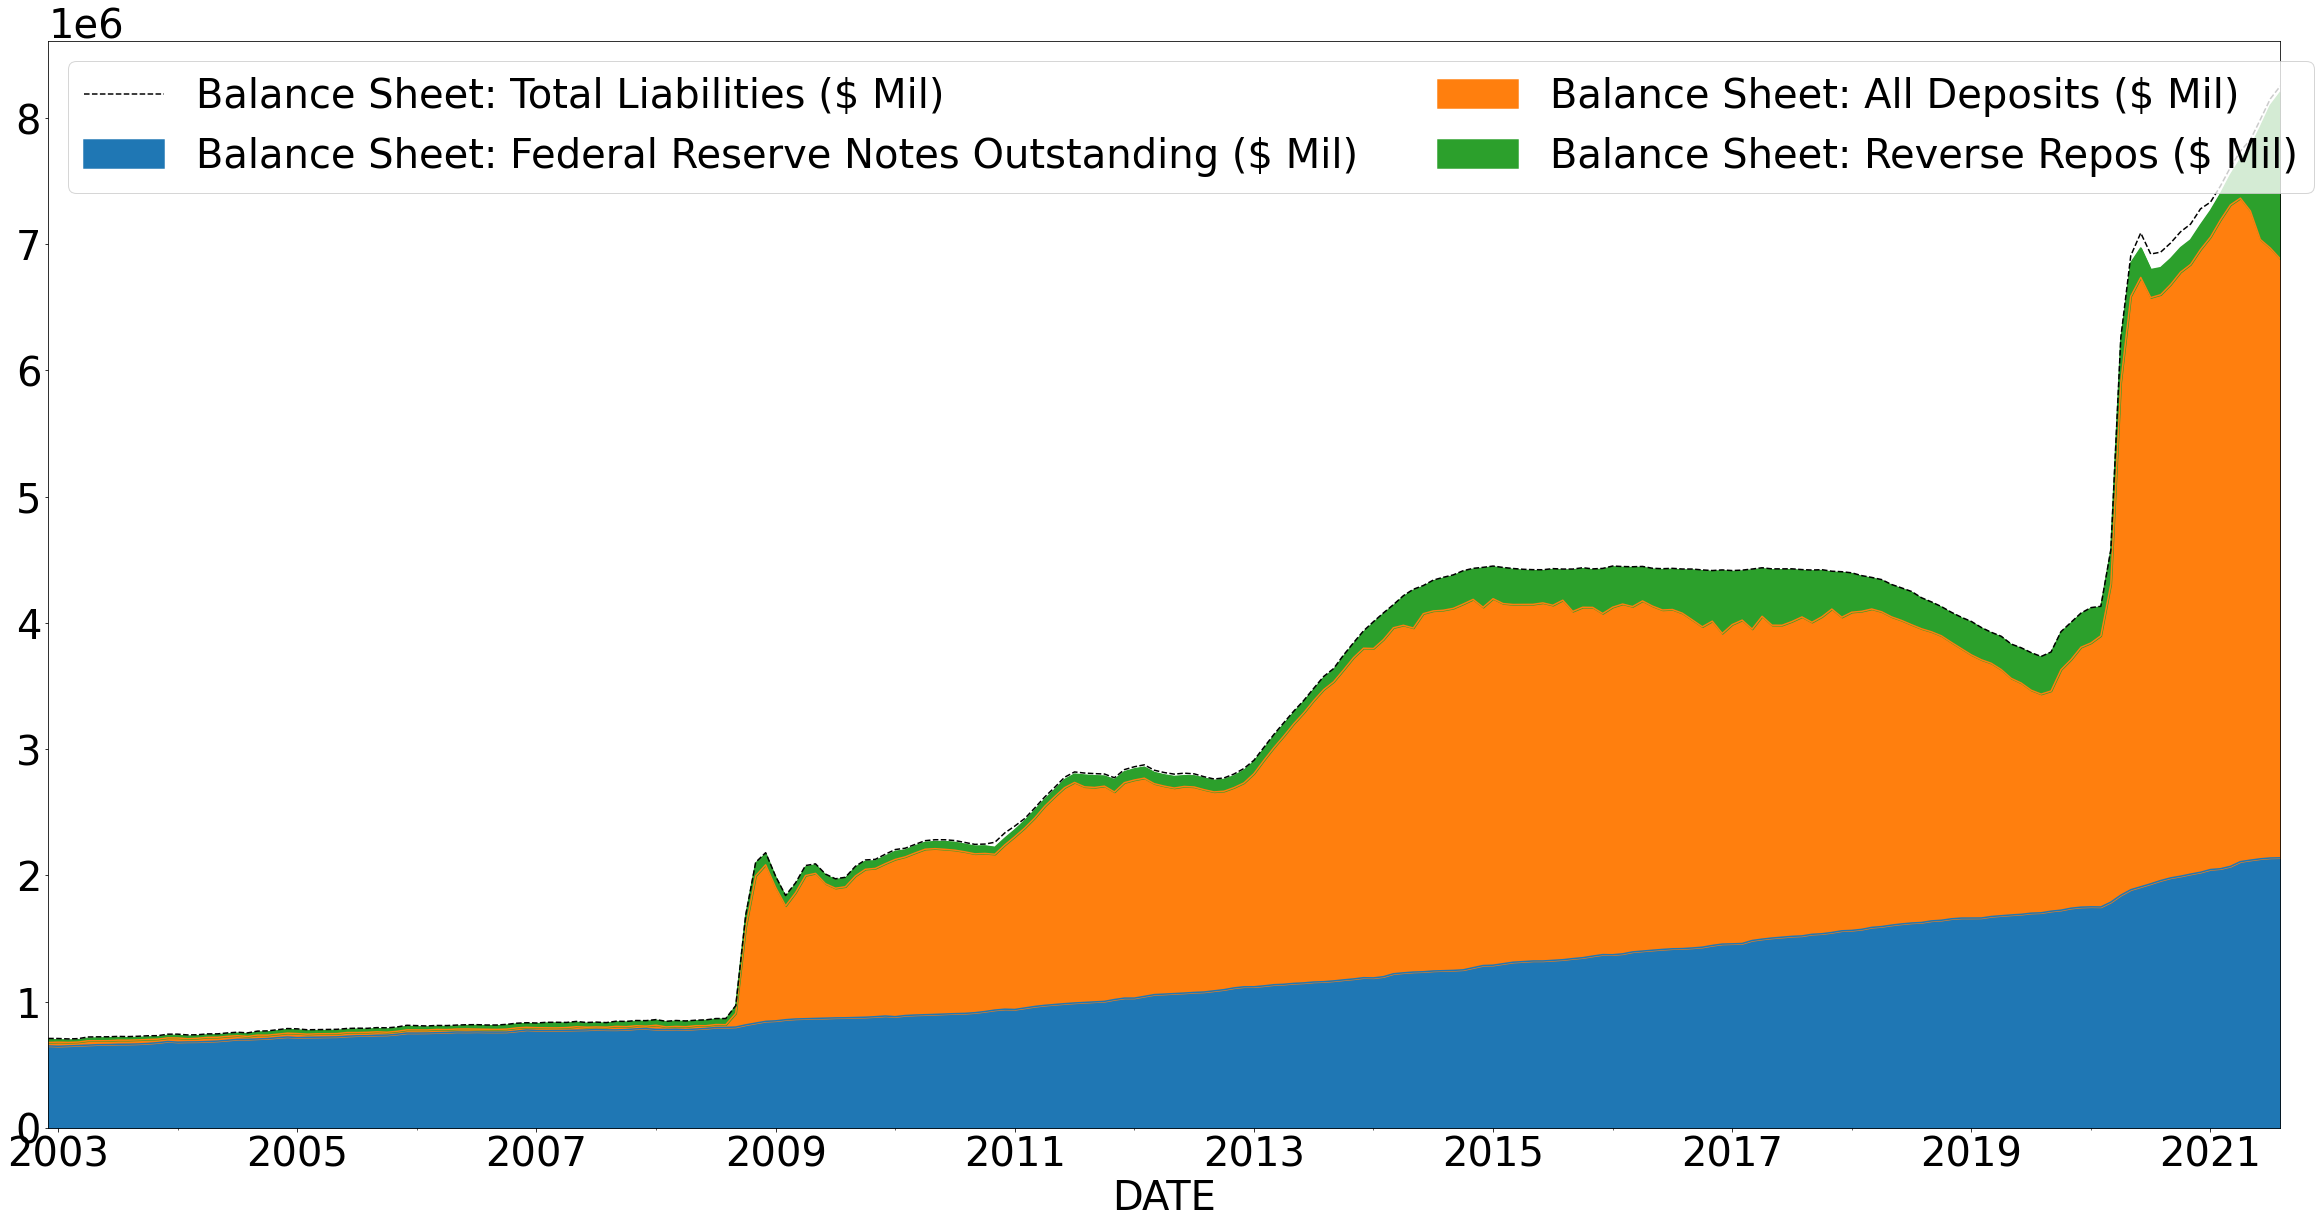

In [72]:
account_vars = ["Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)",
                "Balance Sheet: All Deposits ($ Mil)",
                "Balance Sheet: Reverse Repos ($ Mil)"]

plot_stacked_lines(data.loc['2002-12-31':], account_vars, linewidth = 1.5, total_var = "Balance Sheet: Total Liabilities ($ Mil)")

<ipython-input-9-1d235810f675>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


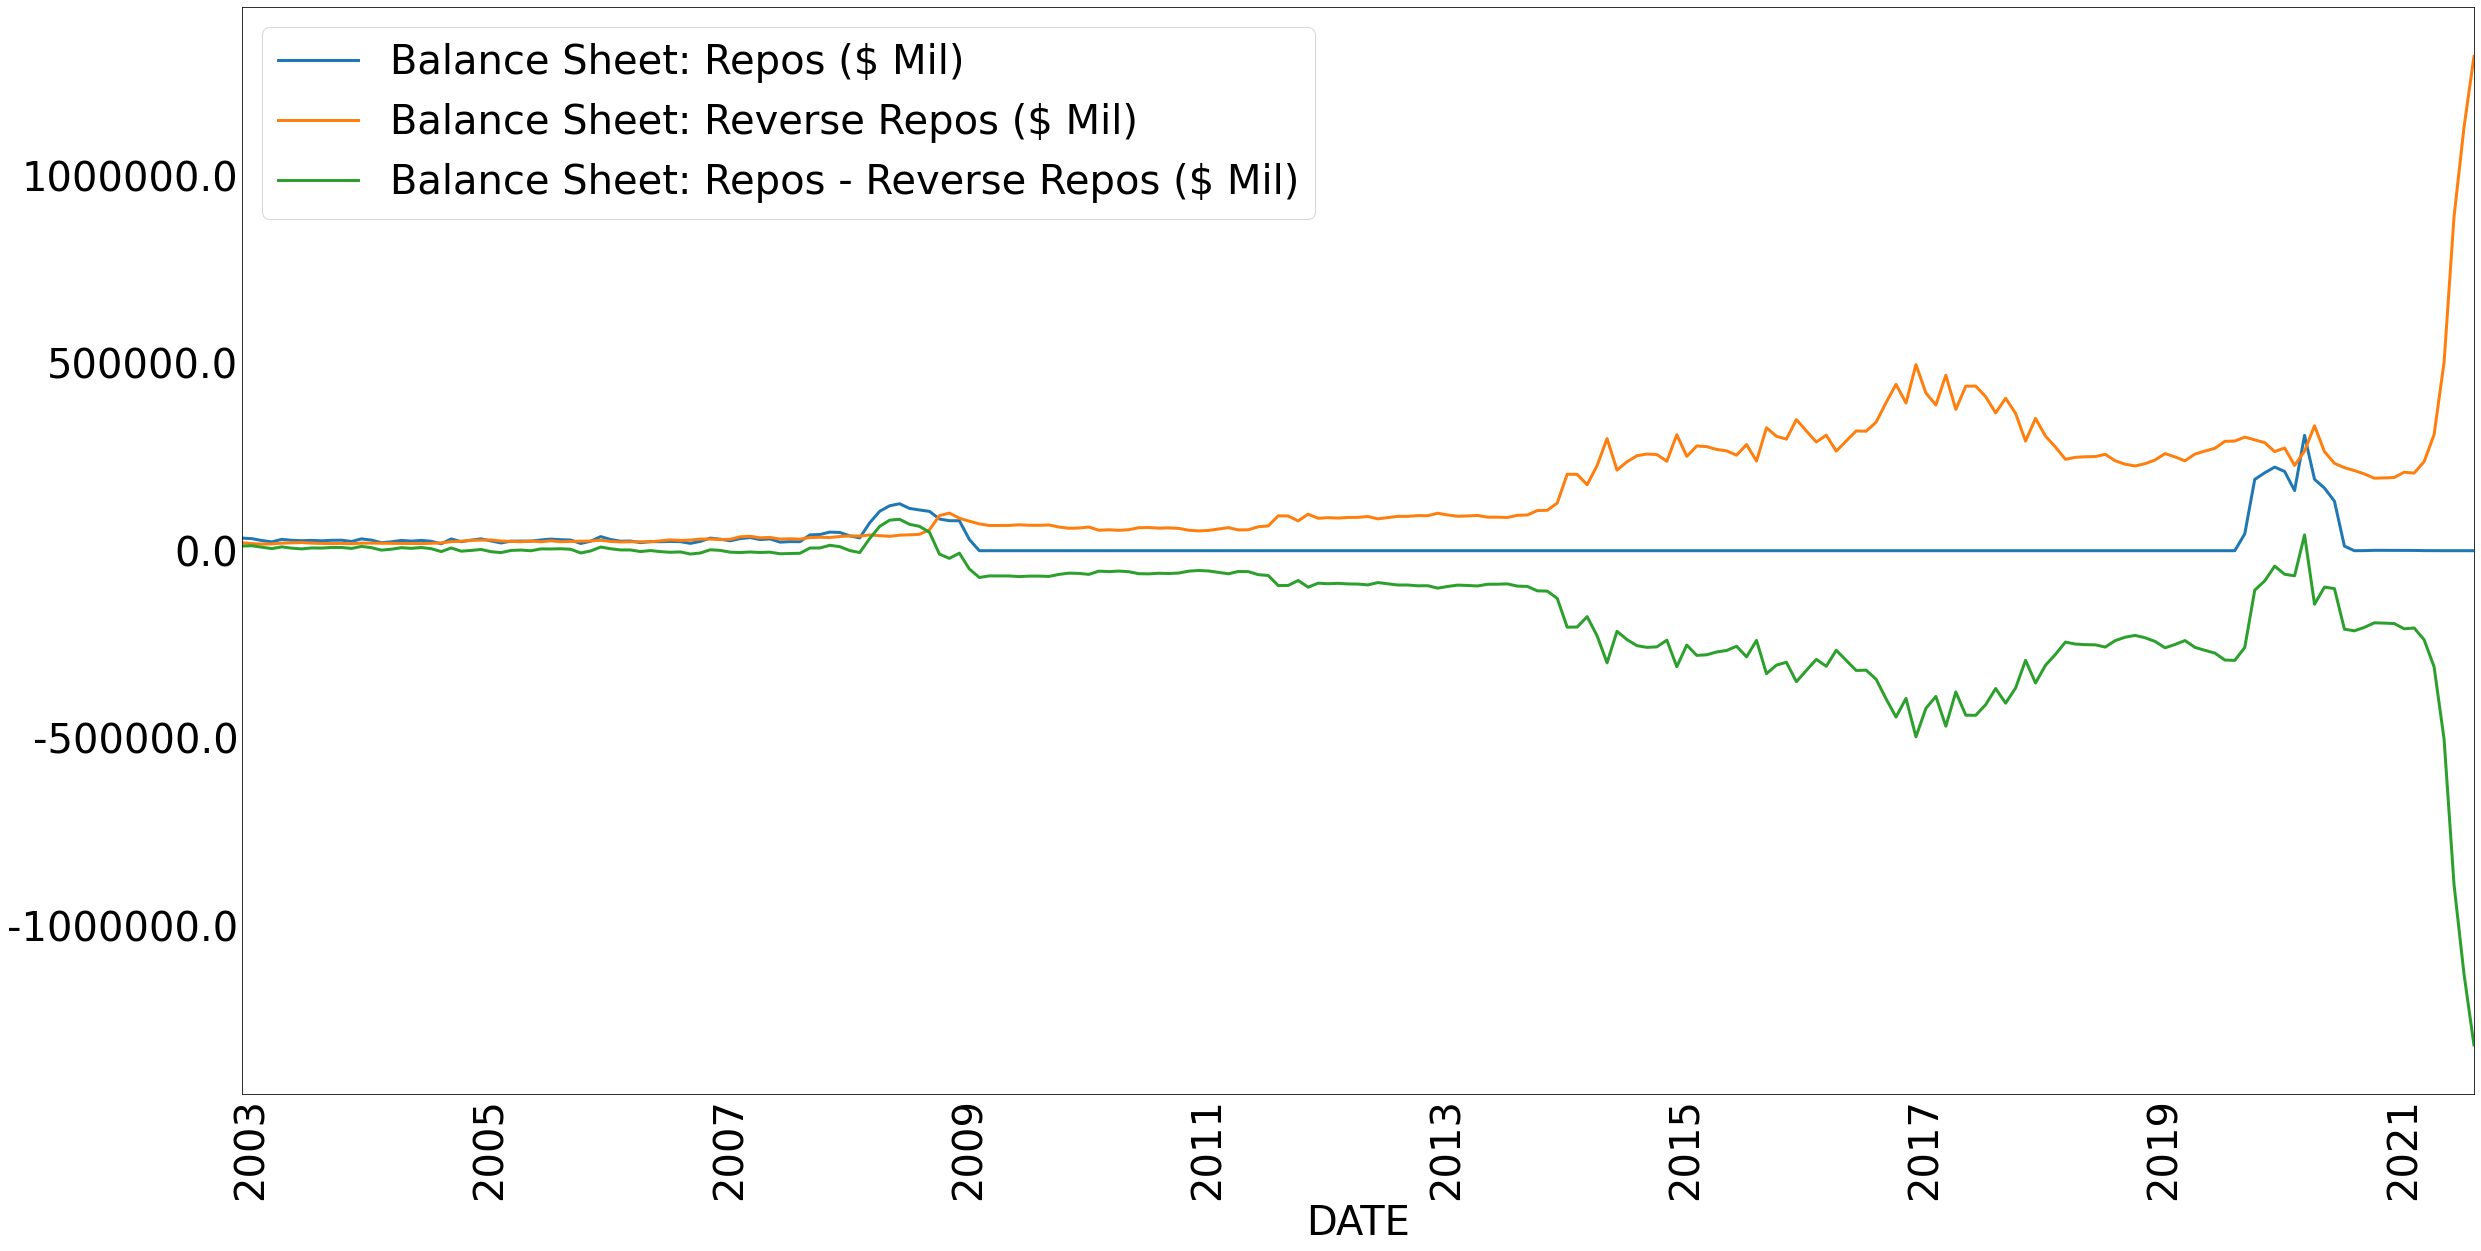

In [73]:
data["Balance Sheet: Repos - Reverse Repos ($ Mil)"] =\
    data["Balance Sheet: Repos ($ Mil)"].sub(data["Balance Sheet: Reverse Repos ($ Mil)"])
overnight_vars = ["Balance Sheet: Repos ($ Mil)",
                  "Balance Sheet: Reverse Repos ($ Mil)",
                  "Balance Sheet: Repos - Reverse Repos ($ Mil)"]

plot_lines(data[overnight_vars], linewidth = 3)
data[overnight_vars].to_csv("repoMarket.csv")

# Interest Rates: 


<ipython-input-9-1d235810f675>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


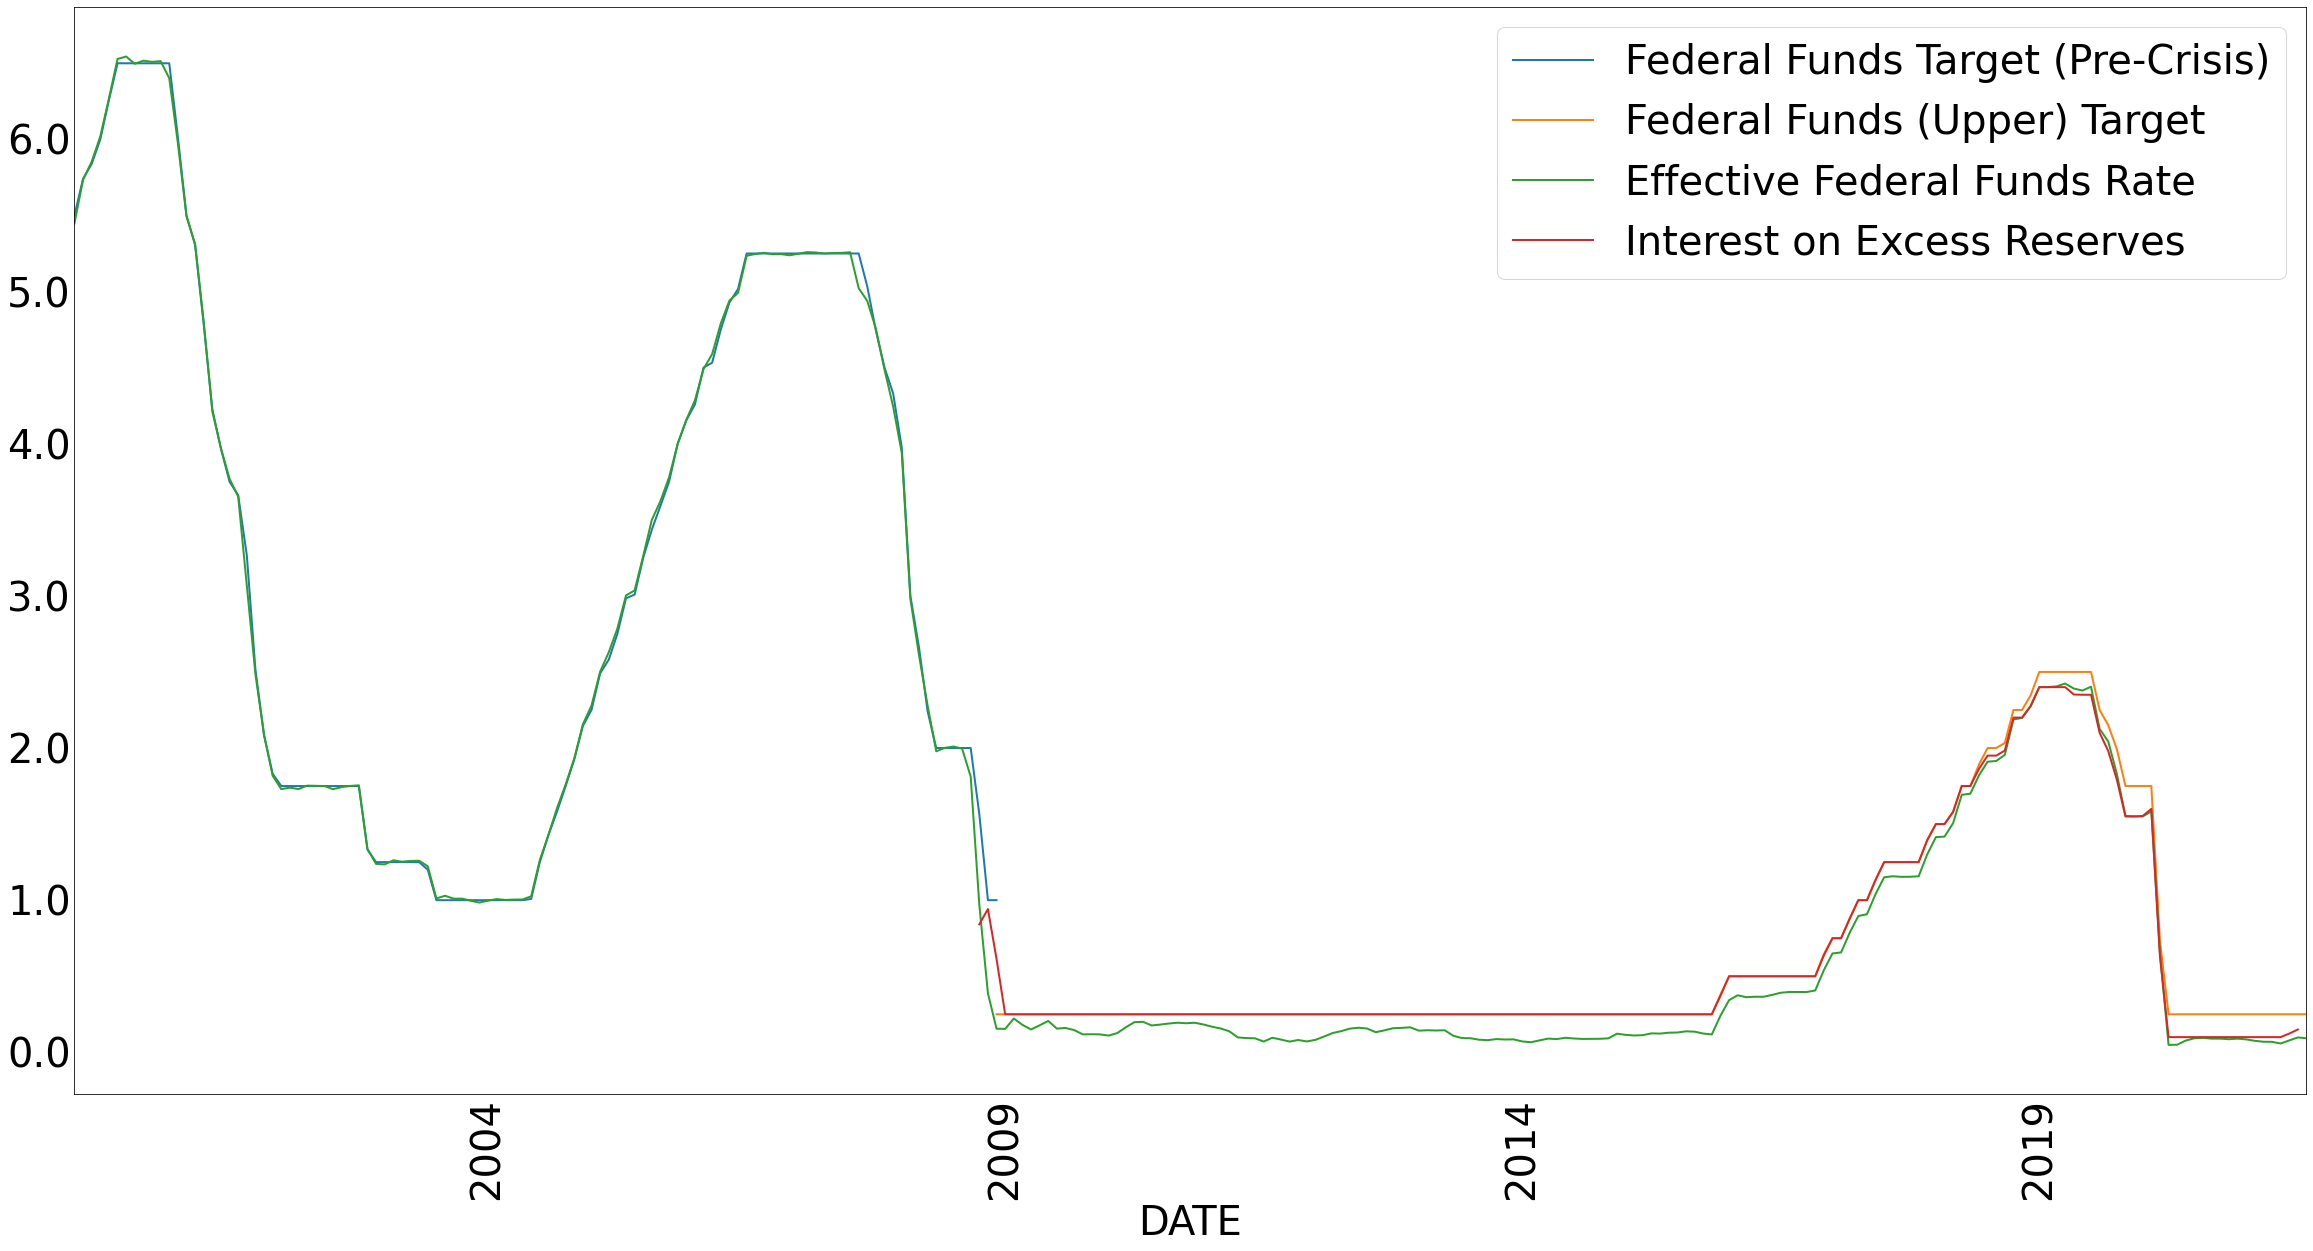

In [79]:
interest_vars = ["Federal Funds Target (Pre-Crisis)",
                  "Federal Funds (Upper) Target",
                  "Effective Federal Funds Rate",
                  "Interest on Excess Reserves"]
plot_lines(data.loc['2000':,interest_vars], linewidth = 2)        


<AxesSubplot:xlabel='DATE'>

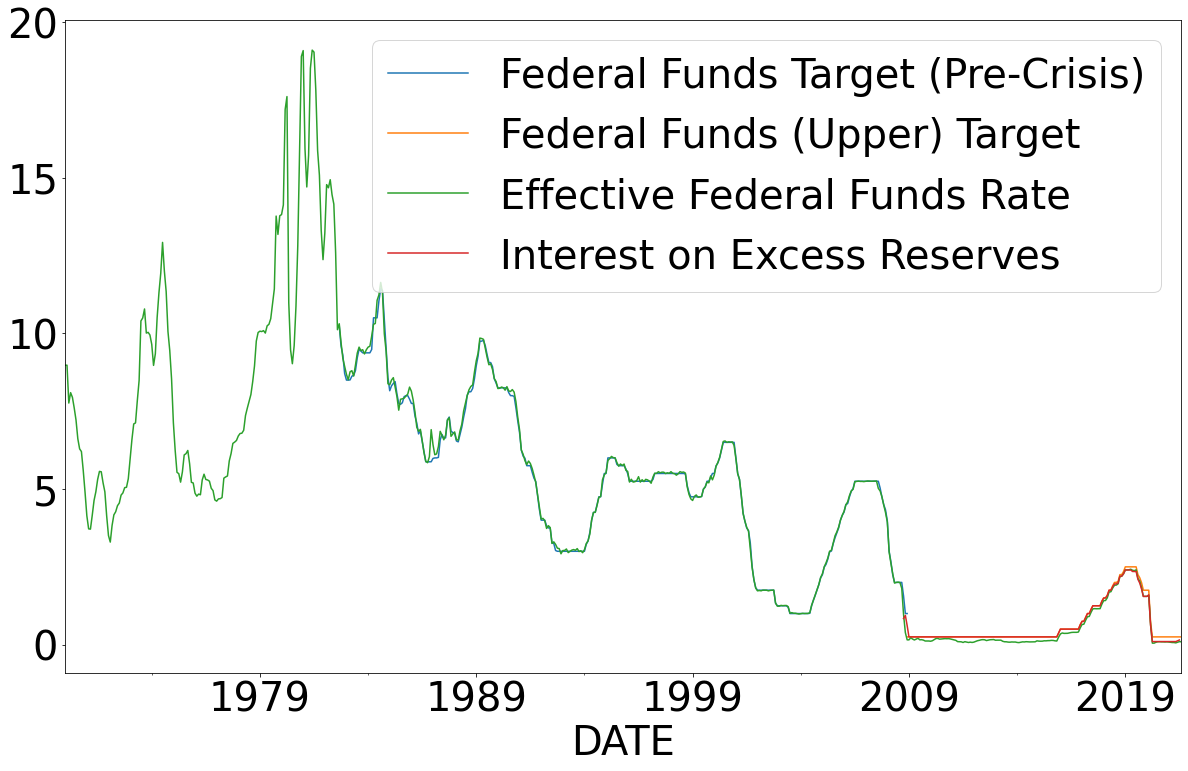

In [80]:
fig, ax = plt.subplots(figsize = (20,12))
data[interest_vars].plot(ax= ax)